In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('1mayo - agosto 2021.csv', on_bad_lines='skip')
# df = pd.read_csv('1mayo - agosto 2021.csv', quoting=csv.QUOTE_NONE, error_bad_lines=False, engine='python')

df.head()

,MAC,weekday,fecha_servidor,fecha_esp32,voltaje,corriente,potencia,frecuencia,energia,fp,ESP32_temp,WORKSTATION_CPU,WORKSTATION_CPU_POWER,WORKSTATION_CPU_TEMP,WORKSTATION_GPU,WORKSTATION_GPU_POWER,WORKSTATION_GPU_TEMP,WORKSTATION_RAM,WORKSTATION_RAM_POWER
0,3C:61:05:12:96:30,4,2021-05-06 10:00:00,2021-05-06 10:00:00,120.1,0.93,96.3,60.0,1.16,0.86,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
1,3C:61:05:12:96:30,4,2021-05-06 10:00:01,2021-05-06 10:00:01,120.1,0.93,96.3,59.9,1.16,0.86,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
2,3C:61:05:12:96:30,4,2021-05-06 10:00:01,2021-05-06 10:00:01,120.0,0.94,96.6,59.9,1.16,0.86,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
3,3C:61:05:12:96:30,4,2021-05-06 10:00:02,2021-05-06 10:00:02,120.0,0.94,96.6,59.9,1.16,0.86,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
4,3C:61:05:12:96:30,4,2021-05-06 10:00:03,2021-05-06 10:00:03,120.0,0.94,96.6,59.9,1.16,0.86,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0


In [4]:
# df.dtypes

In [5]:
# df.describe()

In [6]:
# df.isnull().sum()

In [7]:
df["DATETIME"] = pd.to_datetime(df["fecha_servidor"])

In [8]:
df.set_index("DATETIME", inplace=True)
df.sort_index(inplace=True)  # Ensure data is sorted chronologically



In [9]:
# print(df.index.is_monotonic_increasing)  # Should be True if time is in order
# print(df.index.to_series().diff().value_counts())  # Check time gaps


In [10]:
newdf = df.drop(columns=['MAC','fecha_servidor','fecha_esp32'])
newdf.head()

,weekday,voltaje,corriente,potencia,frecuencia,energia,fp,ESP32_temp,WORKSTATION_CPU,WORKSTATION_CPU_POWER,WORKSTATION_CPU_TEMP,WORKSTATION_GPU,WORKSTATION_GPU_POWER,WORKSTATION_GPU_TEMP,WORKSTATION_RAM,WORKSTATION_RAM_POWER
DATETIME,,,,,,,,,,,,,,,,
2021-05-05 22:05:27,3,119.9,1.15,126.4,60.0,0.0,0.92,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
2021-05-05 22:05:28,3,119.9,1.09,118.5,60.0,0.0,0.91,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
2021-05-05 22:05:28,3,119.9,1.15,126.4,60.0,0.0,0.92,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
2021-05-05 22:05:29,3,120.0,1.01,107.7,60.0,0.0,0.89,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
2021-05-05 22:05:29,3,119.9,1.09,118.5,60.0,0.0,0.91,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0


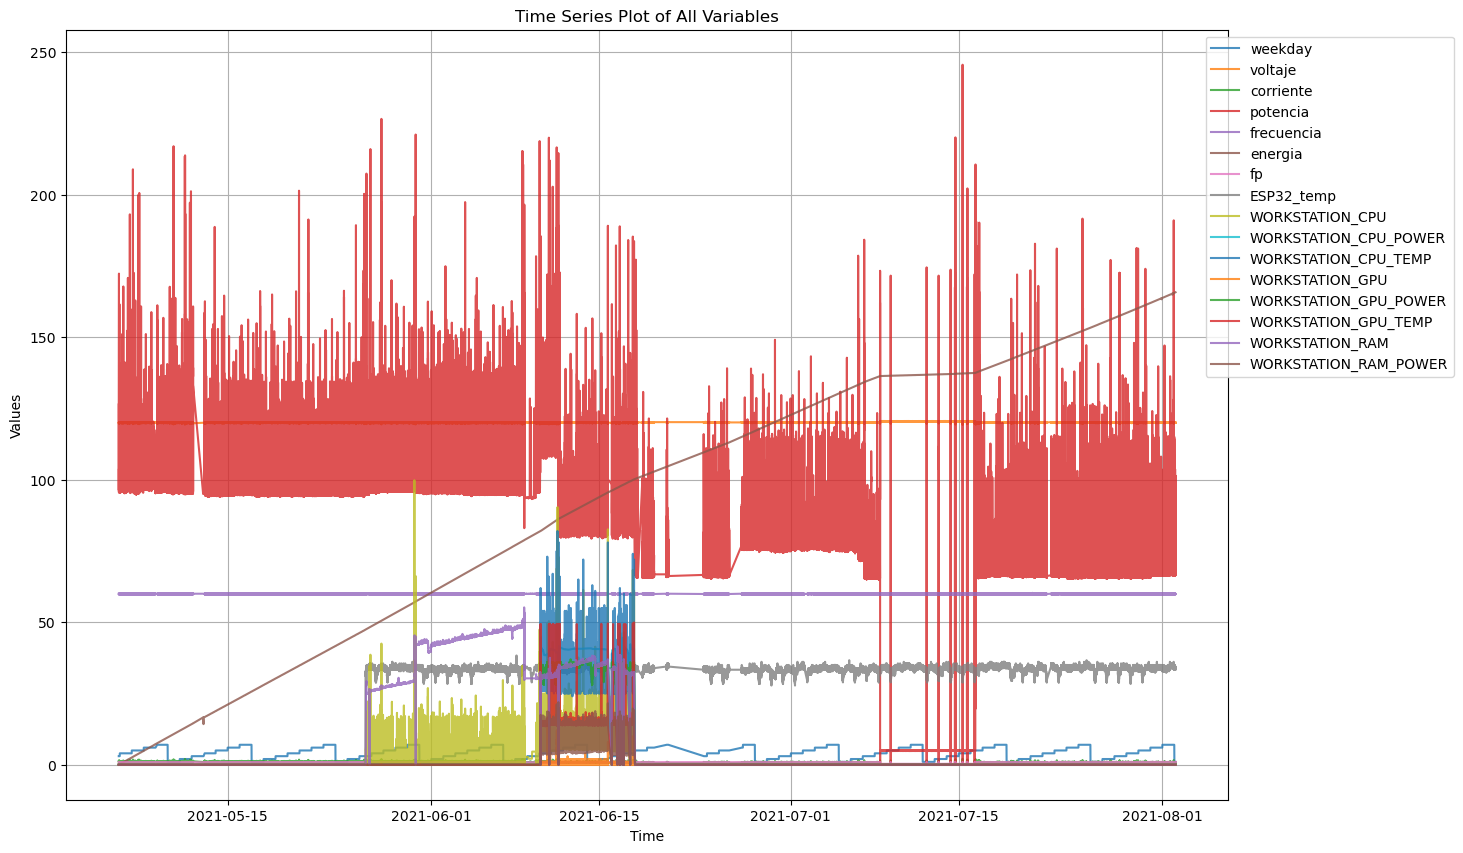

In [11]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(15, 10))

# Plot each column
for column in newdf.columns:
    plt.plot(newdf.index, newdf[column], label=column, alpha=0.8)

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Plot of All Variables')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


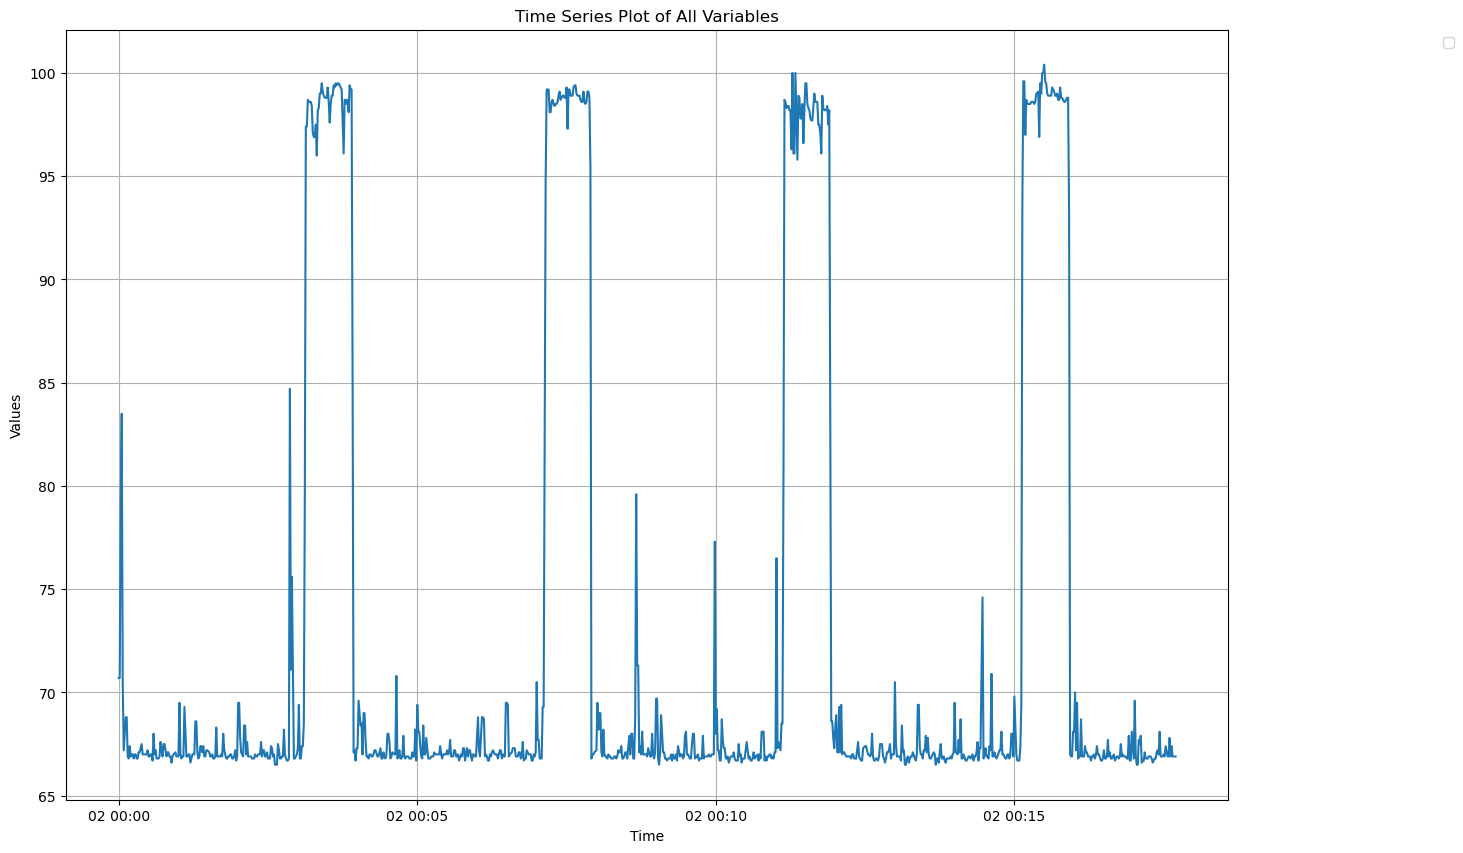

In [12]:
last_day = newdf.index.max().date()  # Get the date of the last timestamp
filtered_df = newdf[newdf.index.date == last_day]  # Filter rows with the last day's date

plt.figure(figsize=(15, 10))

plt.plot(filtered_df['potencia'][:1000])

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Plot of All Variables')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()


In [13]:
filtered_df.columns

Index(['weekday', 'voltaje', 'corriente', 'potencia', 'frecuencia', 'energia',
       'fp', 'ESP32_temp', 'WORKSTATION_CPU', 'WORKSTATION_CPU_POWER',
       'WORKSTATION_CPU_TEMP', 'WORKSTATION_GPU', 'WORKSTATION_GPU_POWER',
       'WORKSTATION_GPU_TEMP', 'WORKSTATION_RAM', 'WORKSTATION_RAM_POWER'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


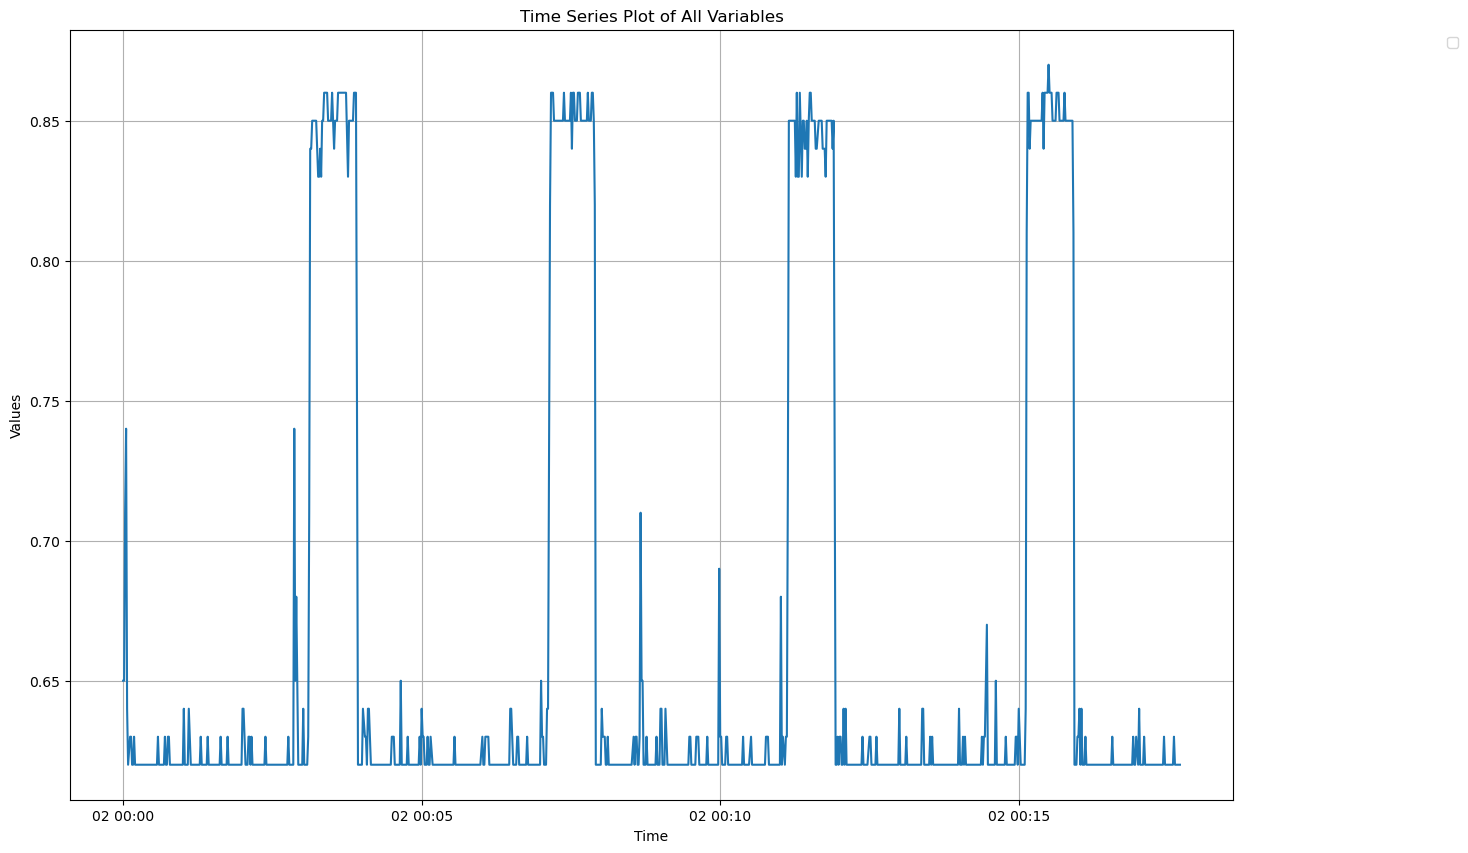

In [14]:
plt.figure(figsize=(15, 10))

plt.plot(filtered_df['corriente'][:1000])

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Plot of All Variables')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


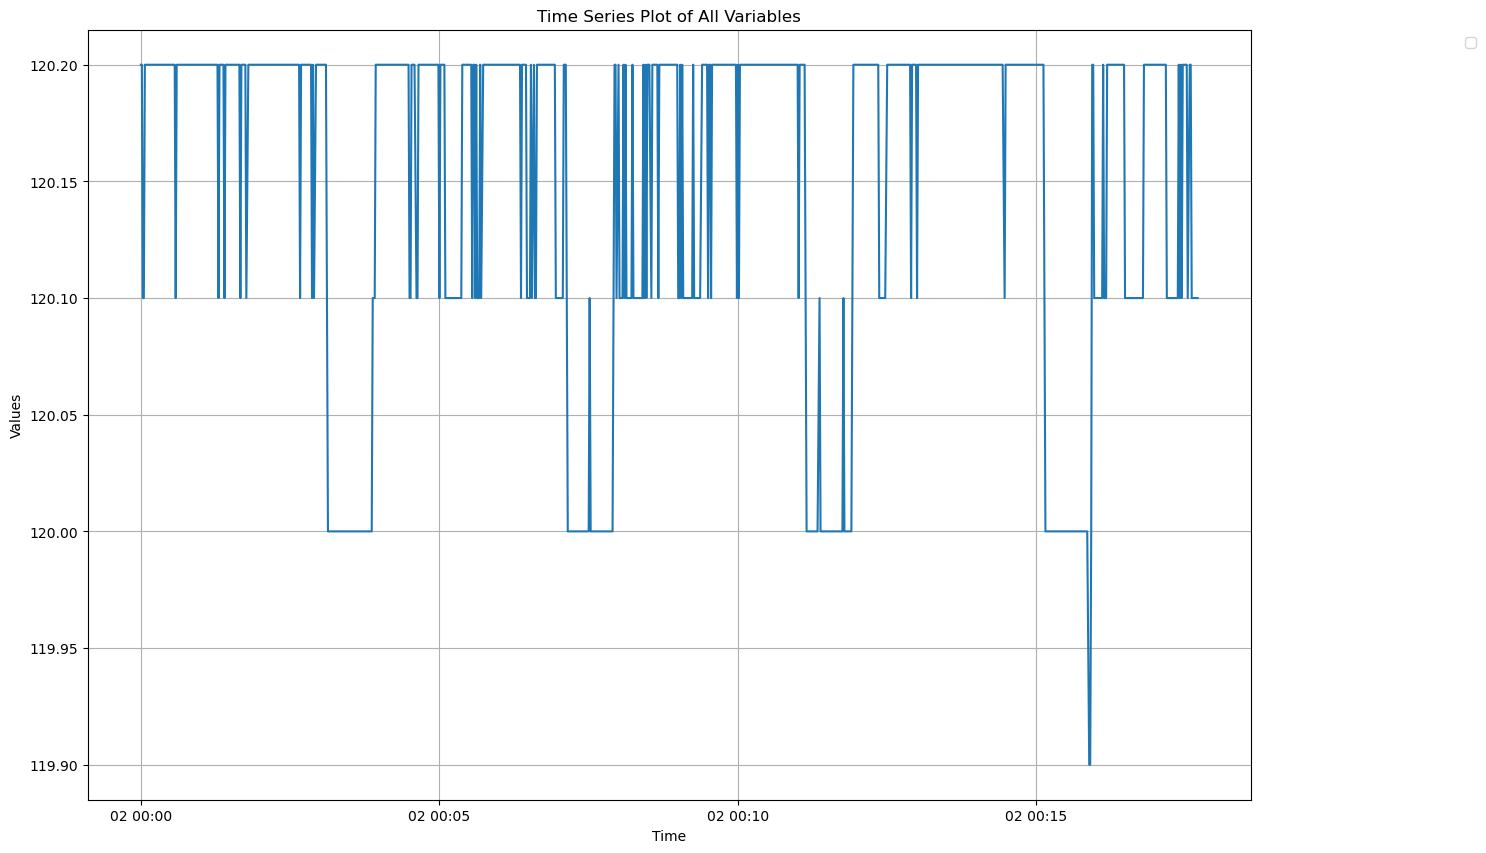

In [15]:
plt.figure(figsize=(15, 10))

plt.plot(filtered_df['voltaje'][:1000])

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Plot of All Variables')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


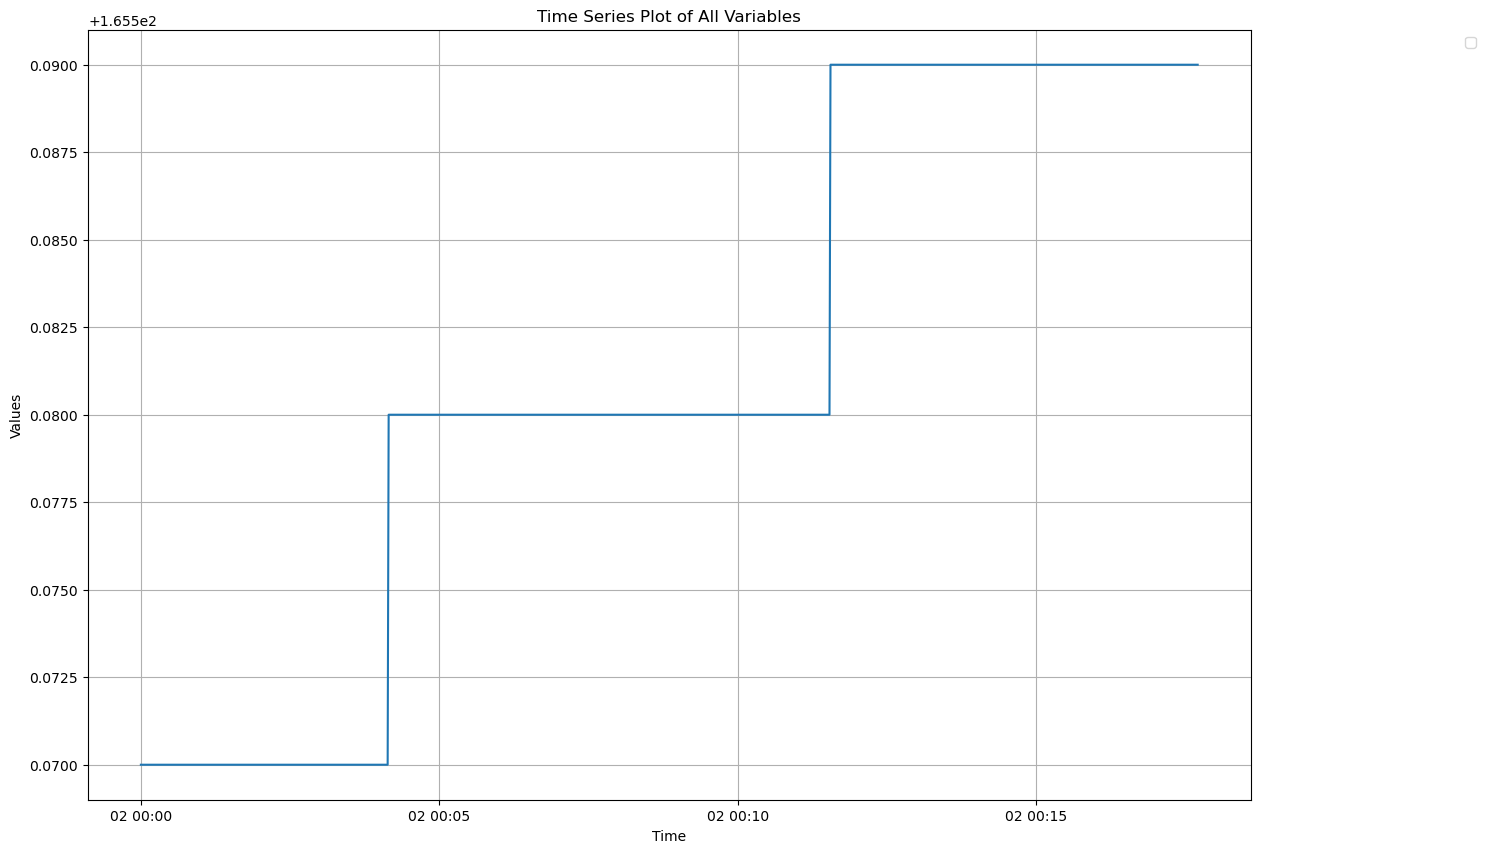

In [16]:
plt.figure(figsize=(15, 10))

plt.plot(filtered_df['energia'][:1000])

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Plot of All Variables')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


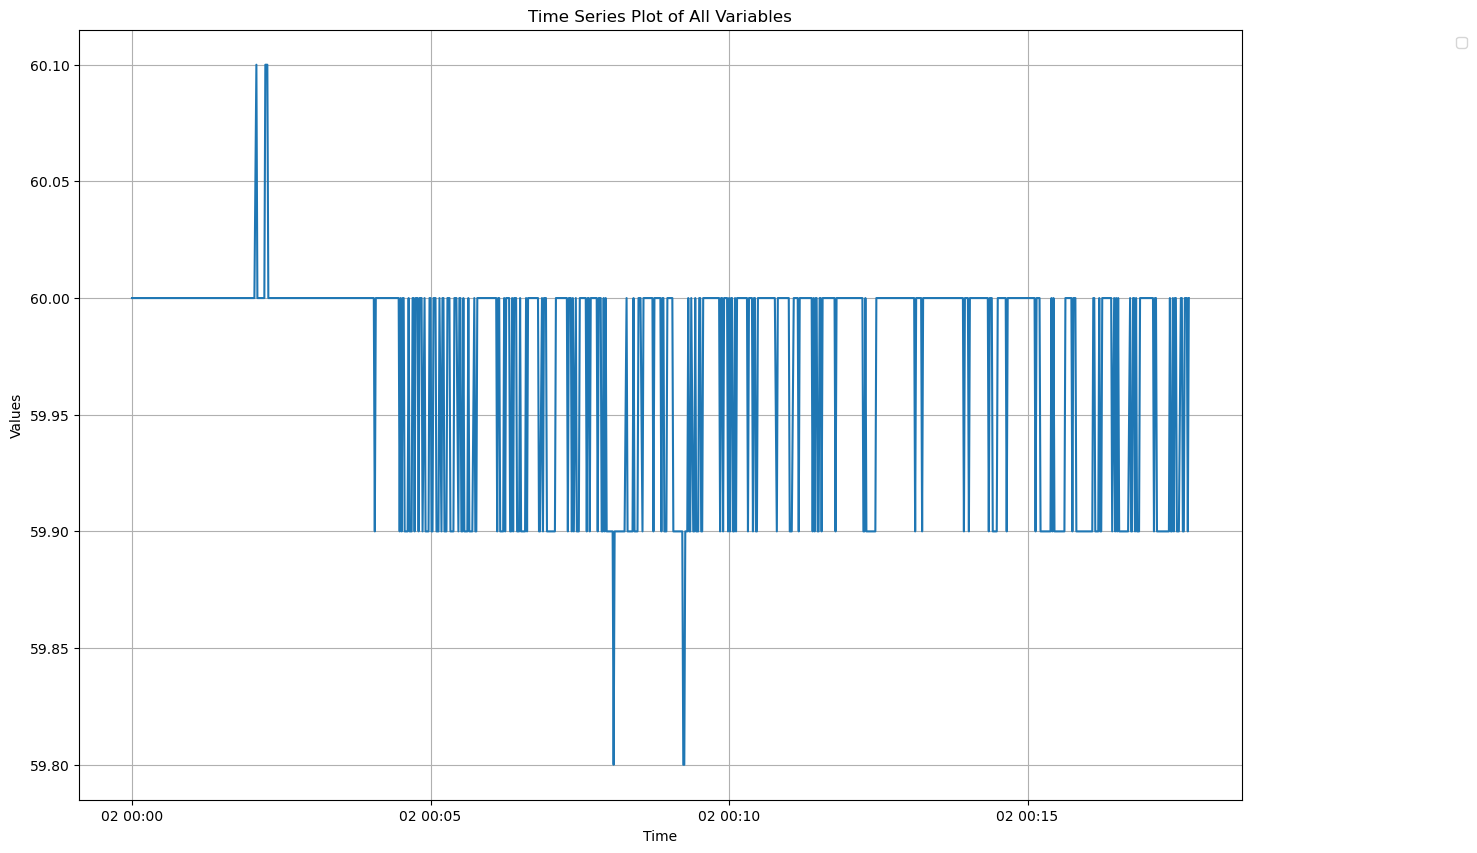

In [17]:
plt.figure(figsize=(15, 10))

plt.plot(filtered_df['frecuencia'][:1000])

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Plot of All Variables')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


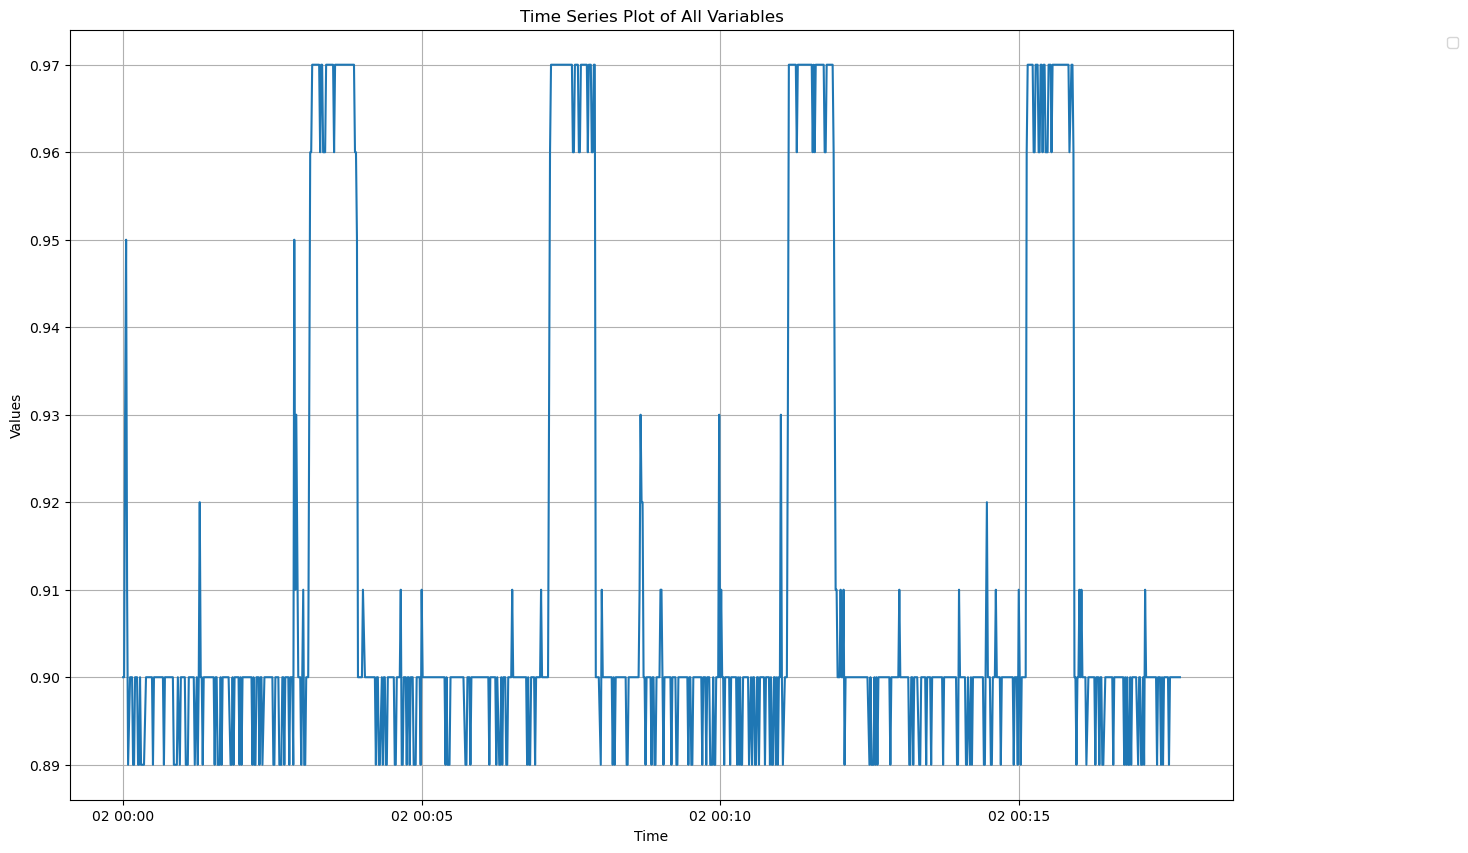

In [18]:
plt.figure(figsize=(15, 10))

plt.plot(filtered_df['fp'][:1000])

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Plot of All Variables')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


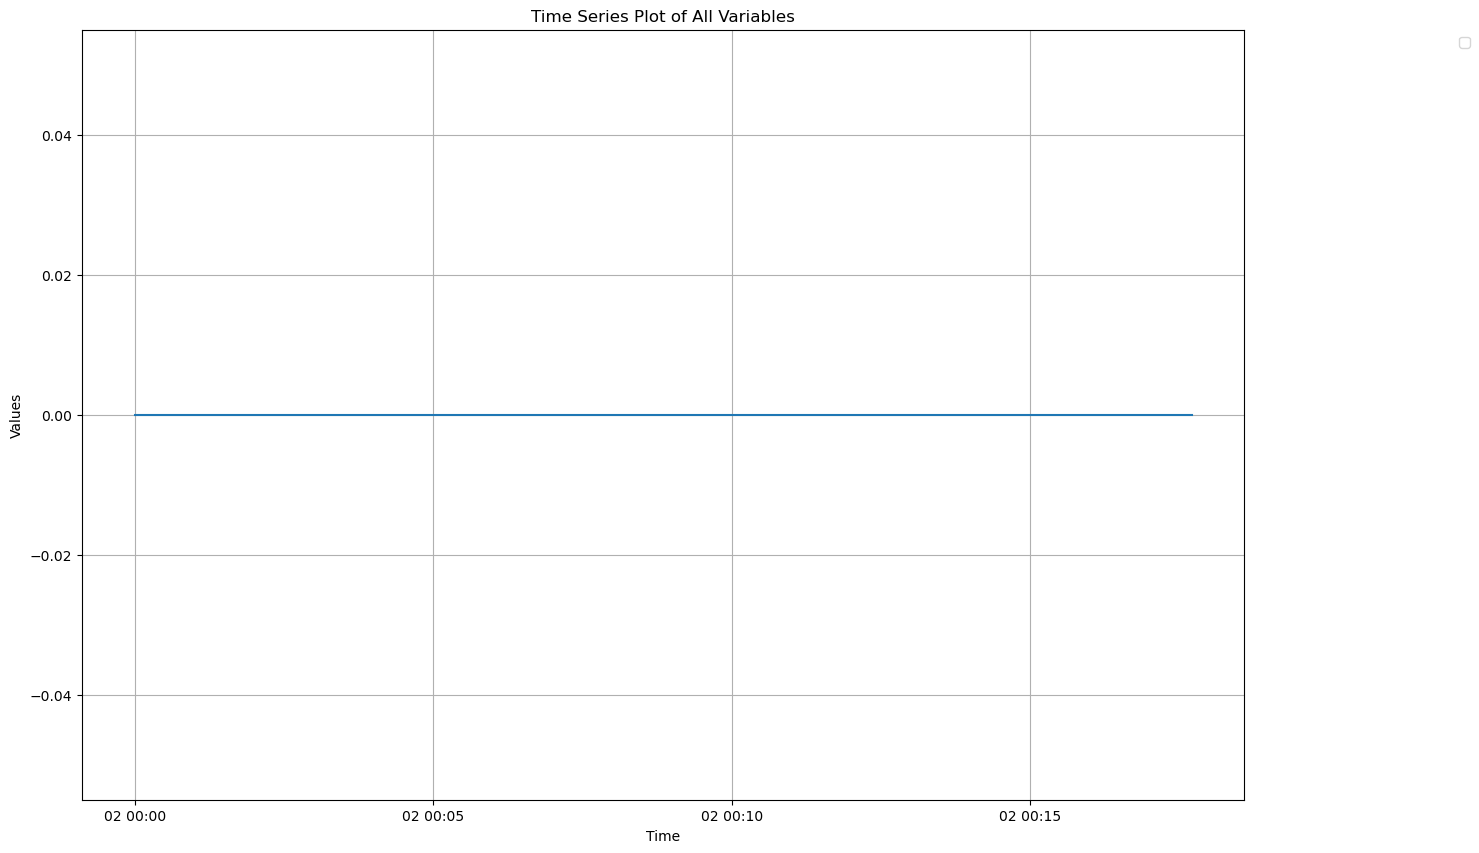

In [19]:
plt.figure(figsize=(15, 10))

plt.plot(filtered_df['WORKSTATION_GPU_TEMP'][:1000])

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Plot of All Variables')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()

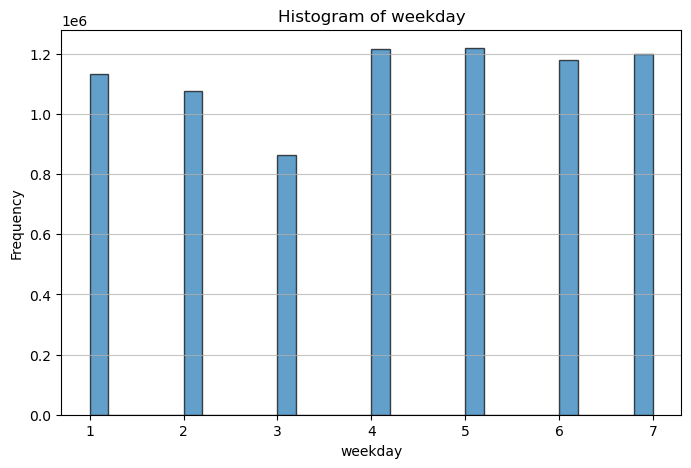

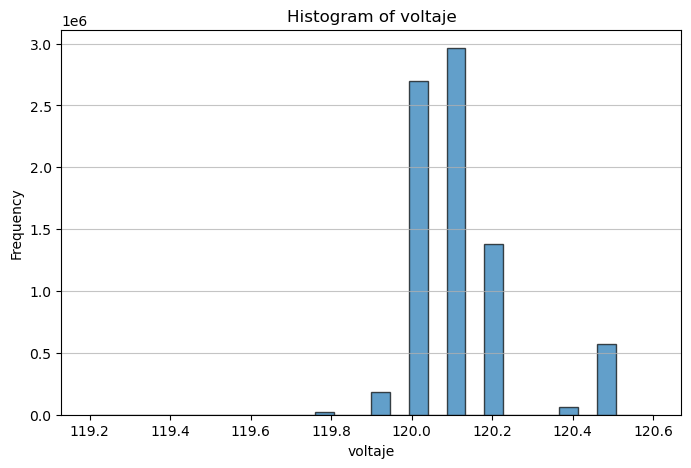

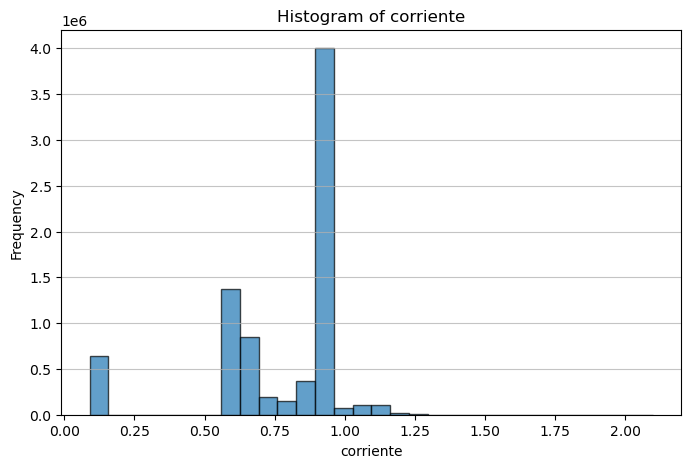

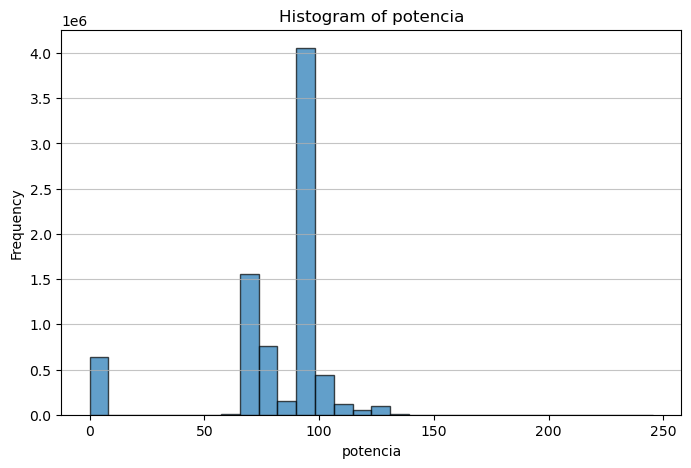

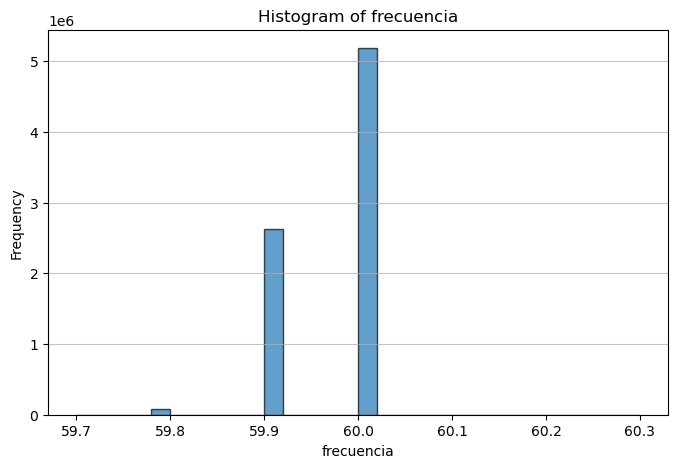

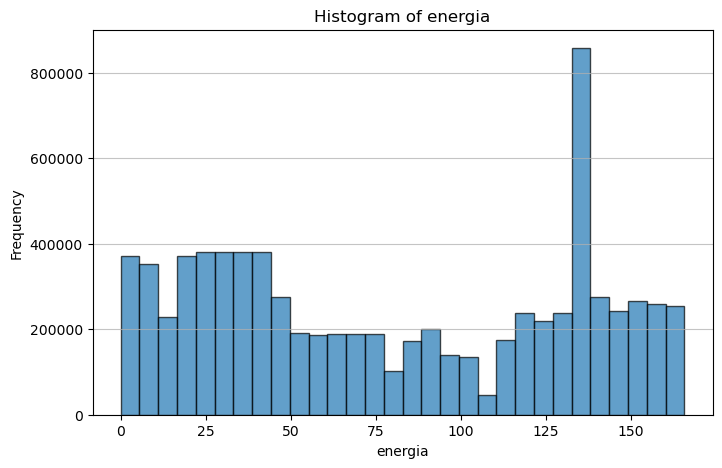

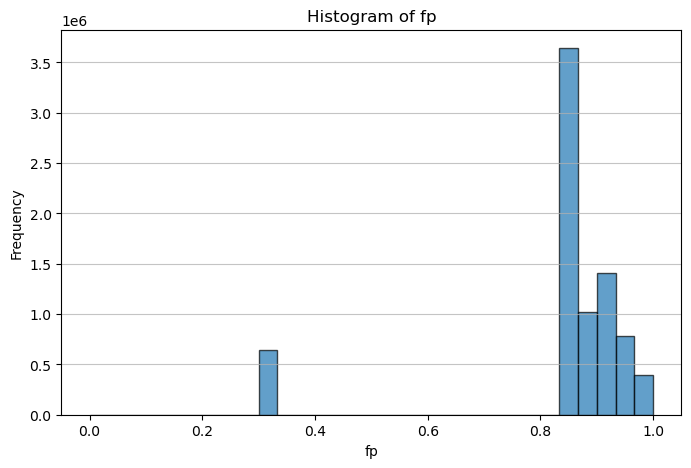

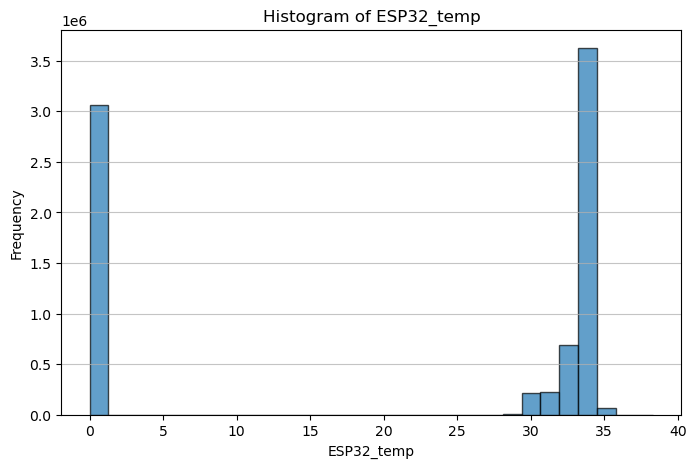

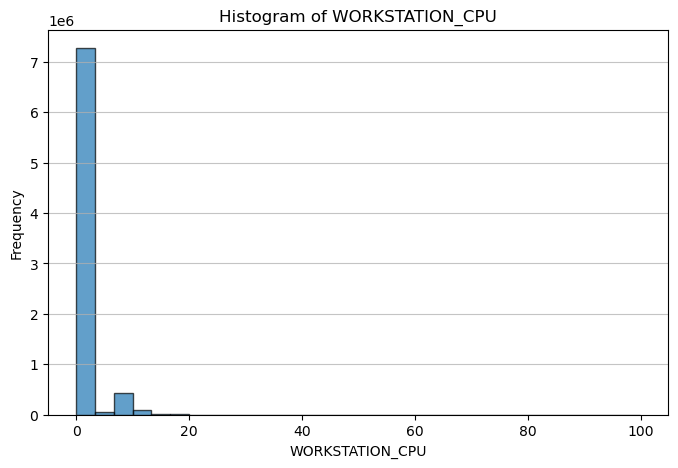

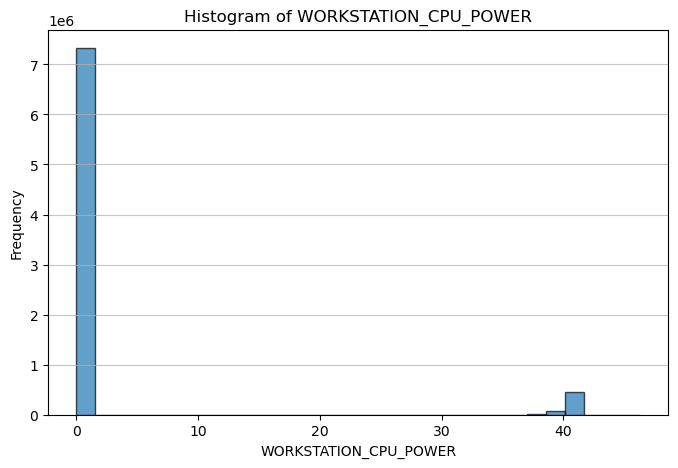

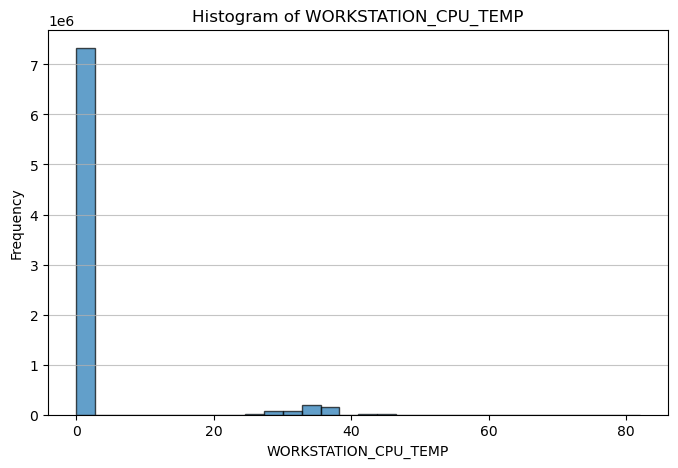

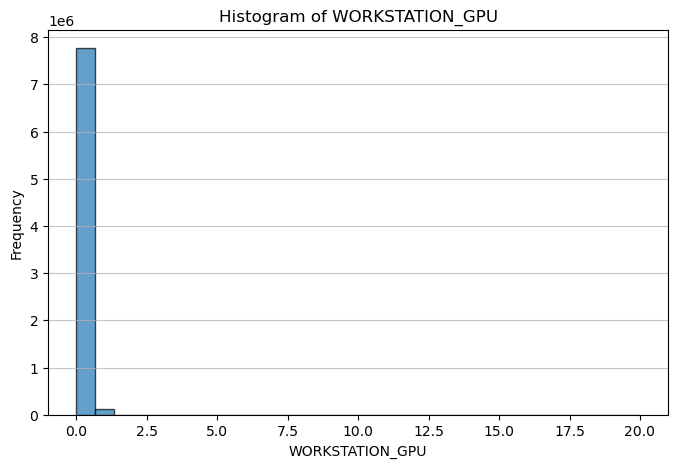

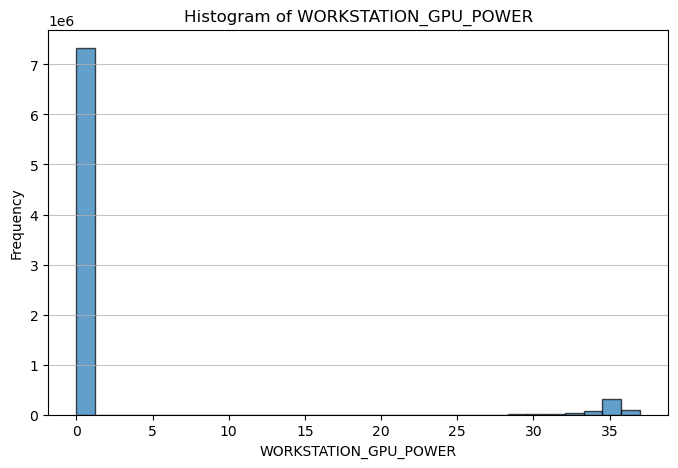

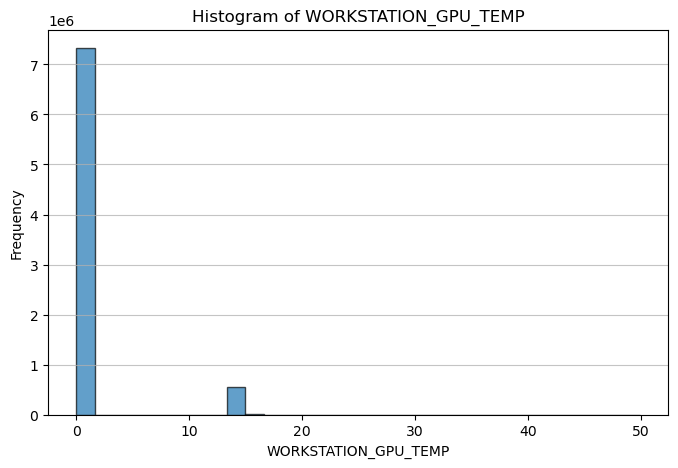

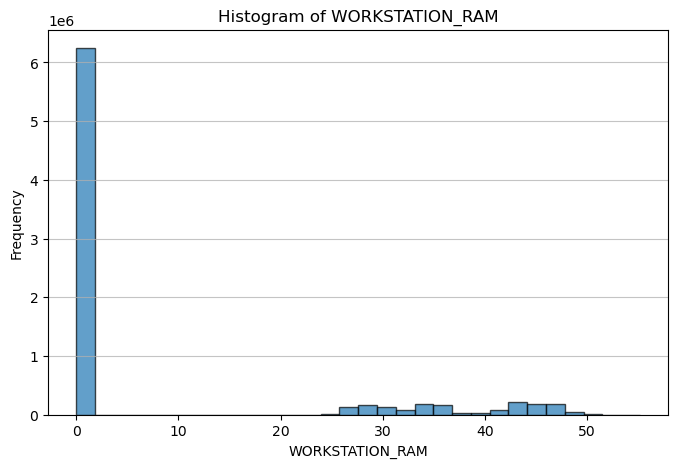

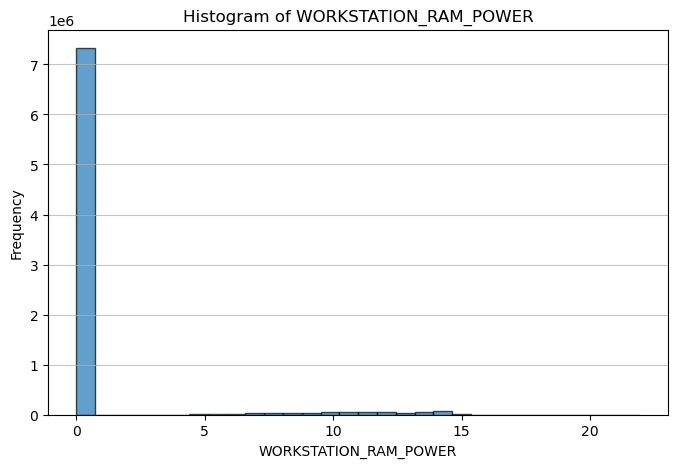

In [20]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Plot histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

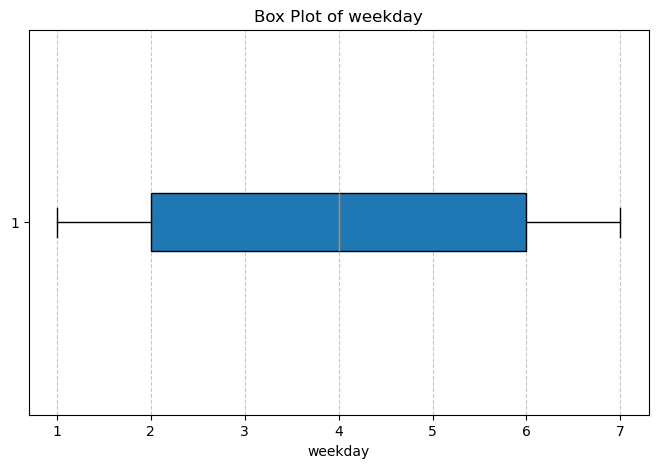

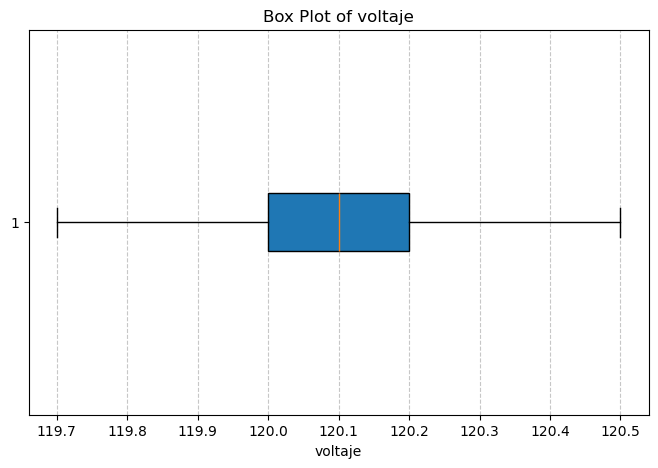

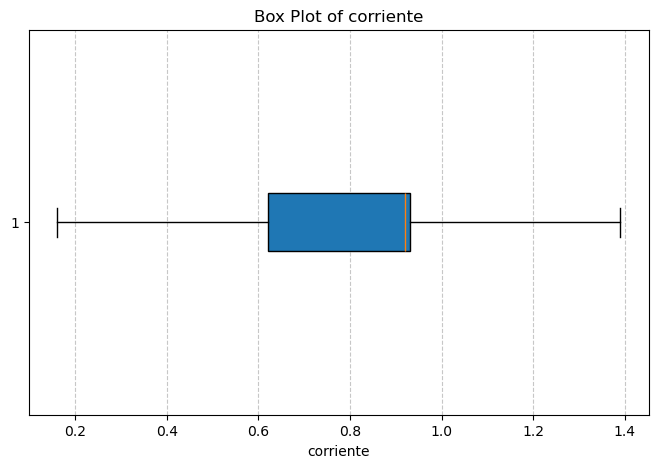

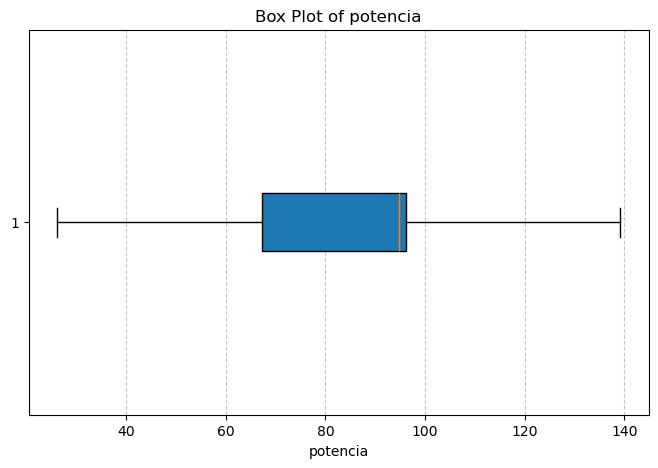

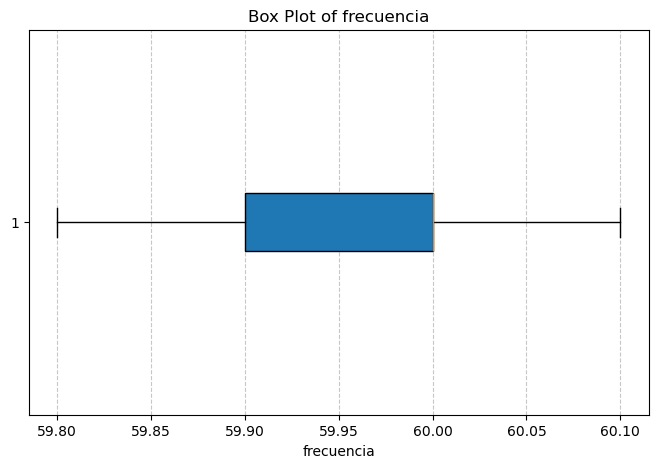

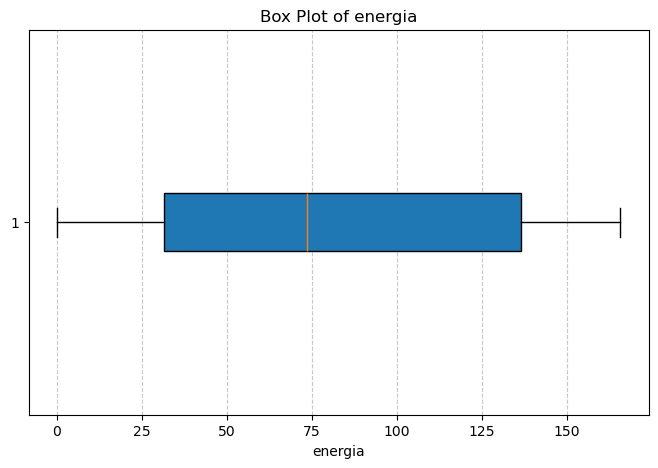

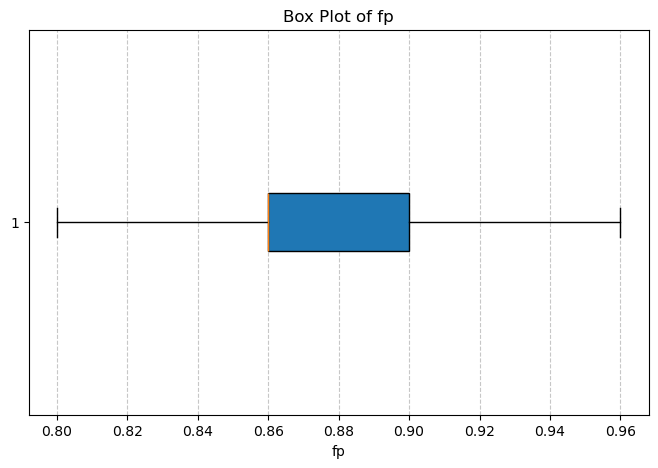

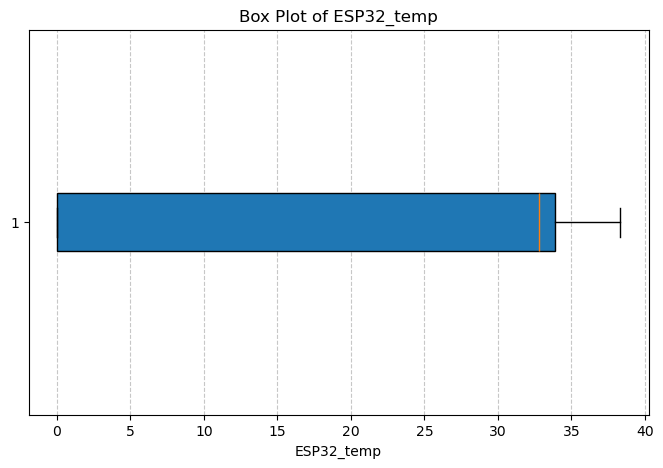

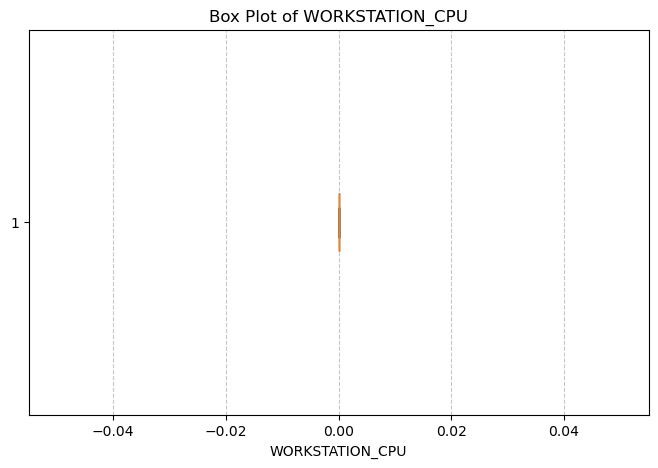

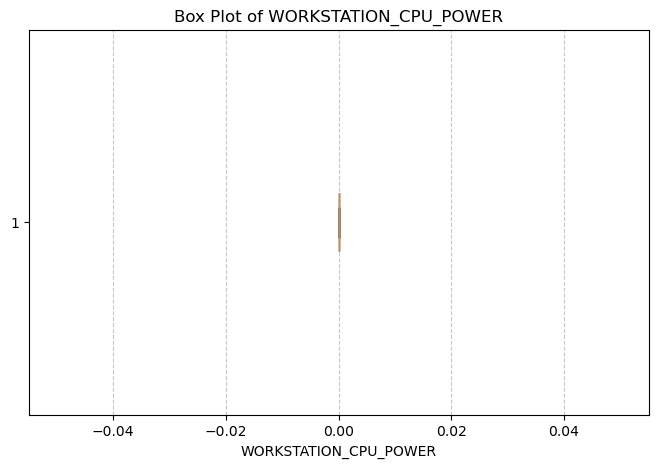

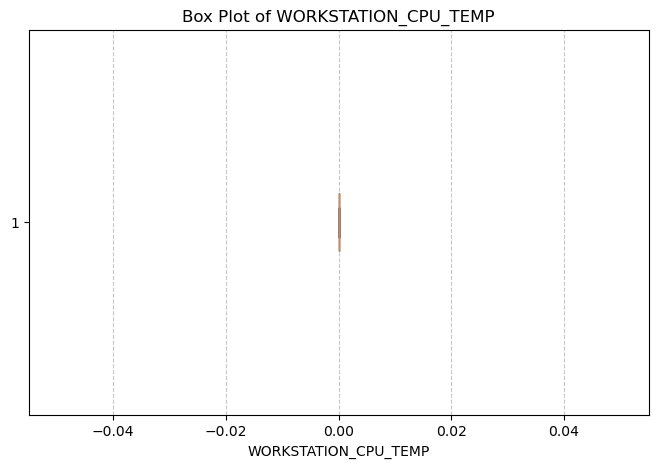

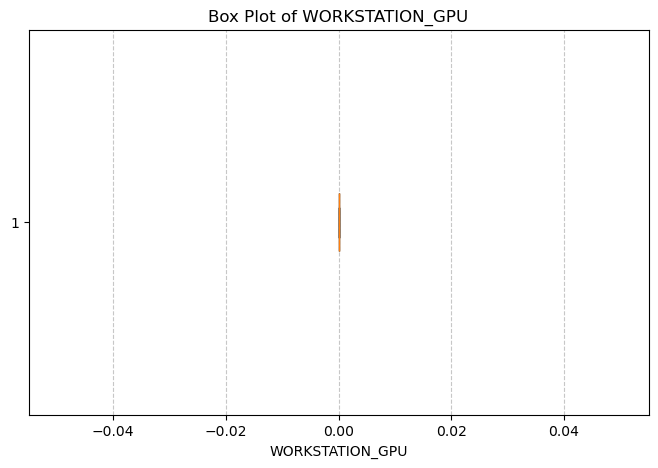

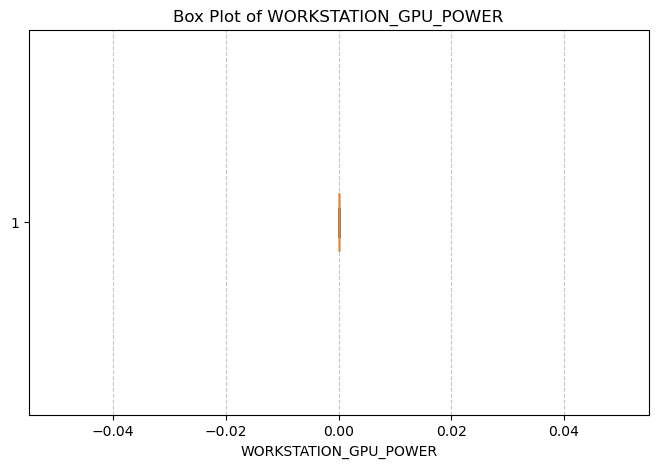

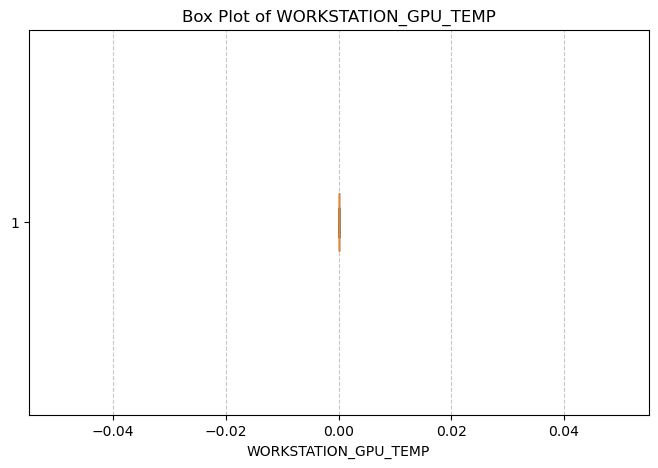

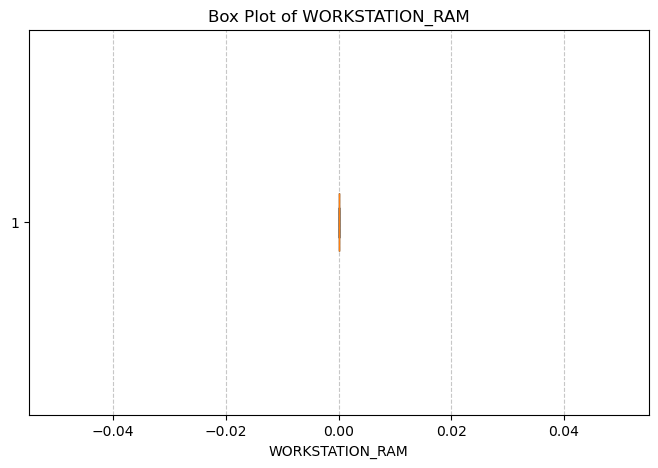

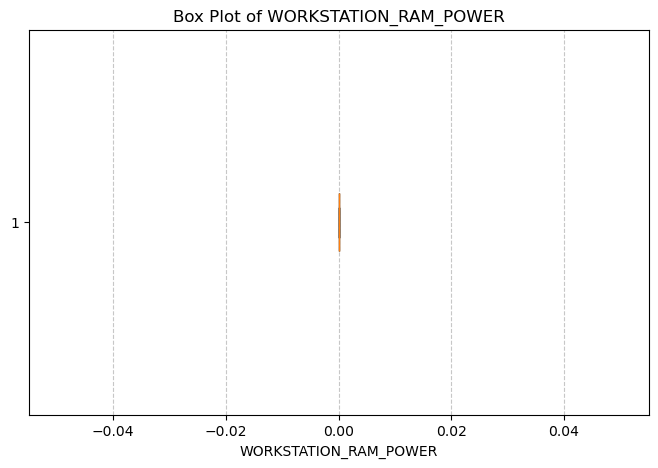

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
# df = pd.read_csv('your_file.csv')  # Replace with your DataFrame

# Exclude datetime and categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Plot boxplots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[column].dropna(), vert=False, patch_artist=True, showfliers=False,
                flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6})
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


In [22]:
import pandas as pd
import plotly.figure_factory as ff
import plotly.graph_objects as go
import math

# Sample DataFrame
# df = pd.read_csv('your_file.csv')  # Replace with your DataFrame

# Exclude datetime and categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Determine the grid size for subplots
num_cols = len(numeric_columns)
rows = math.ceil(num_cols / 3)  # Ensure a 3x3 grid

# Create subplots
fig = make_subplots(rows=rows, cols=3, subplot_titles=numeric_columns)

# Iterate over numeric columns and add box plots
for i, column in enumerate(numeric_columns):
    row = (i // 3) + 1
    col = (i % 3) + 1

    fig.add_trace(
        go.Box(
            x=df[column].dropna(),
            name=column,
            boxpoints="outliers",  # Show outliers
            marker=dict(color="blue"),
            line=dict(color="black"),
        ),
        row=row,
        col=col,
    )

# Update layout
fig.update_layout(
    title="Box Plots of Numeric Columns",
    showlegend=False,
    height=400 * rows,  # Adjust height dynamically
    width=1000,  # Fixed width
)

fig.show()


NameError: name 'make_subplots' is not defined

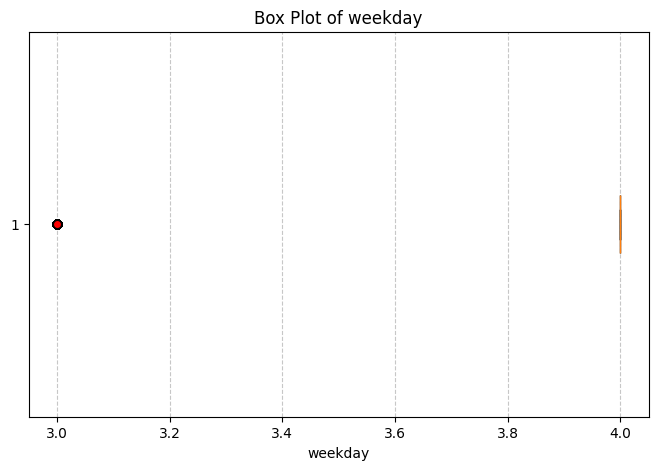

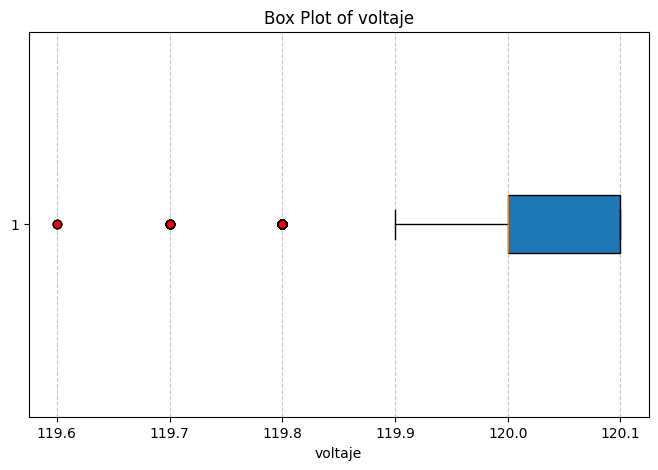

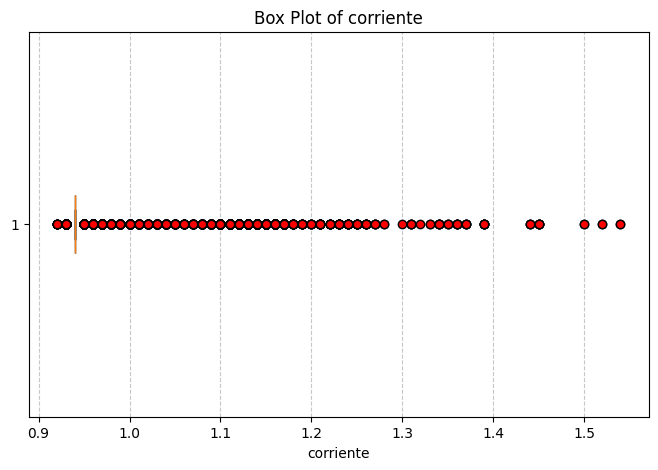

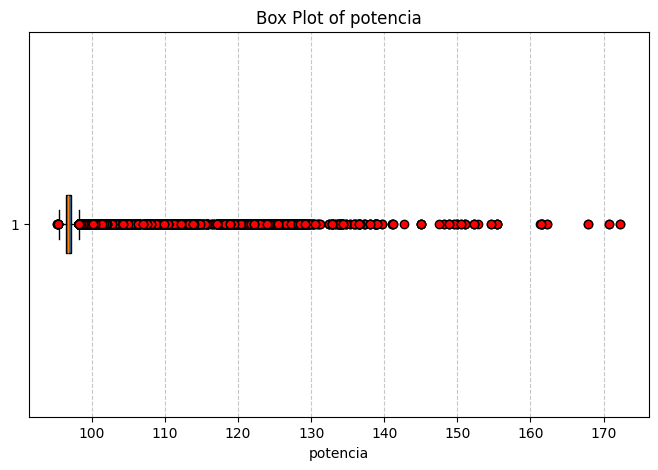

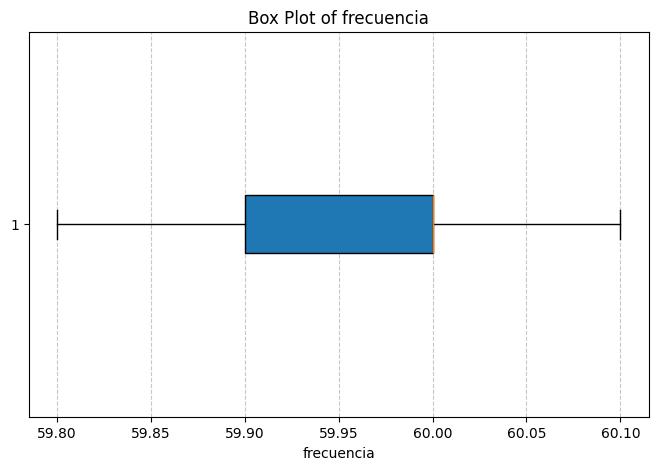

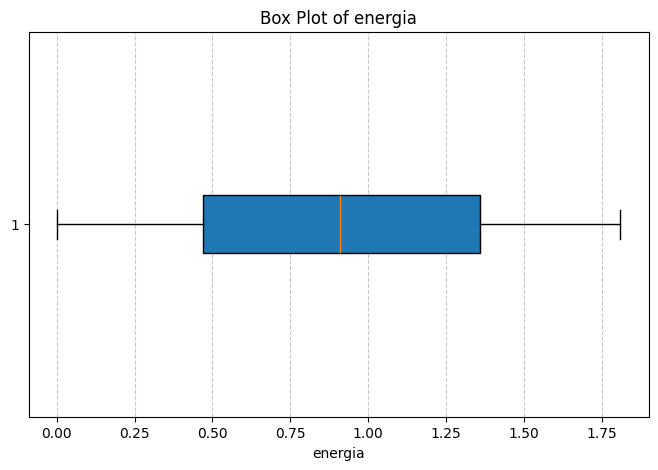

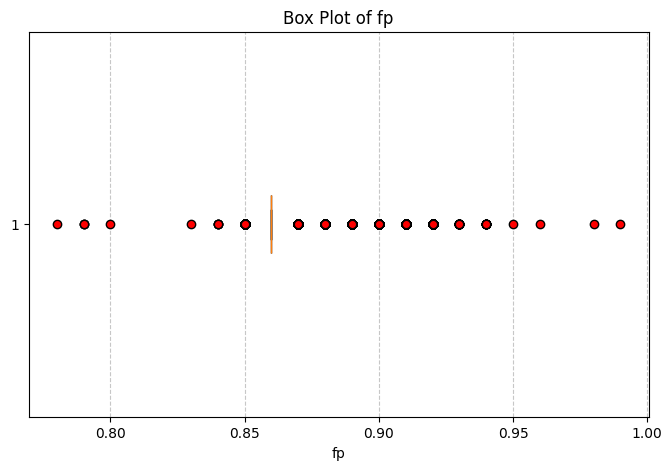

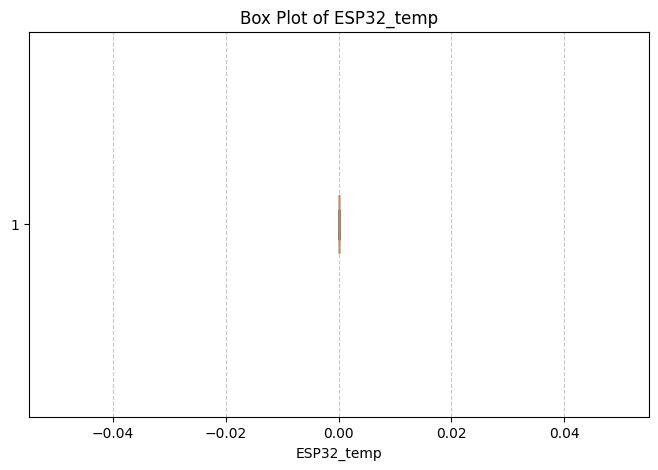

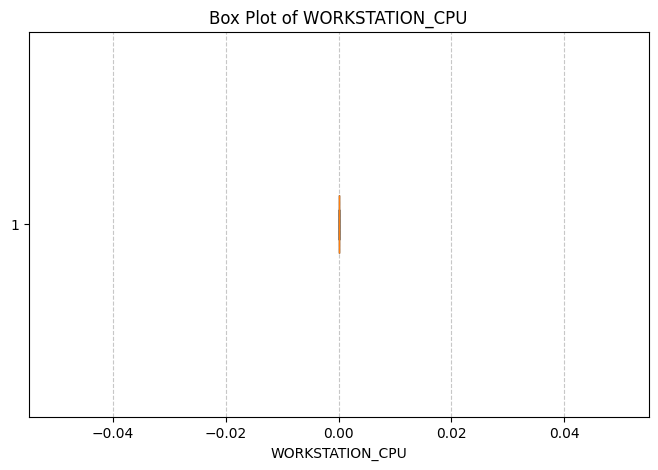

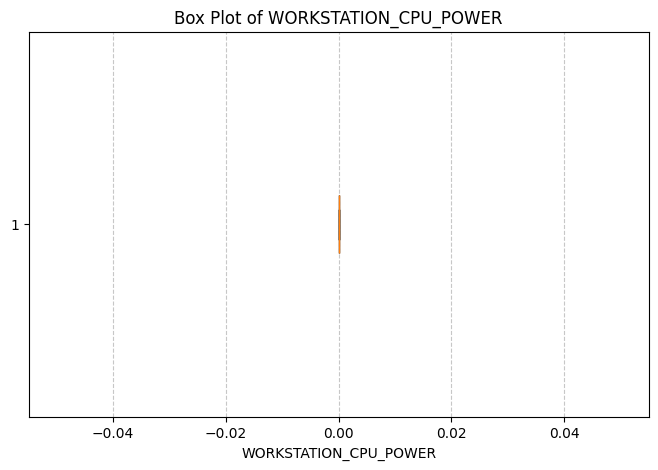

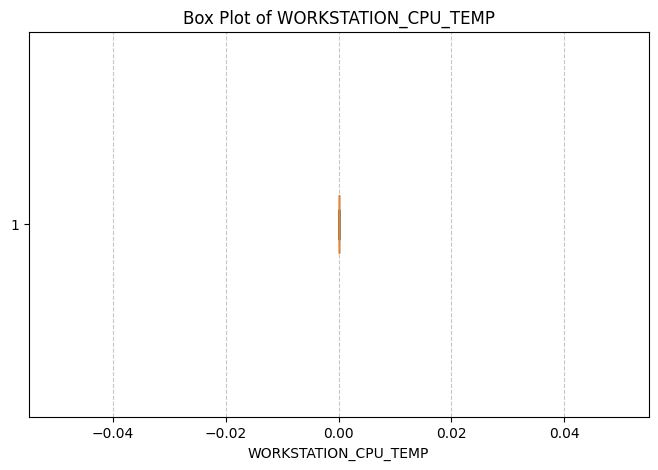

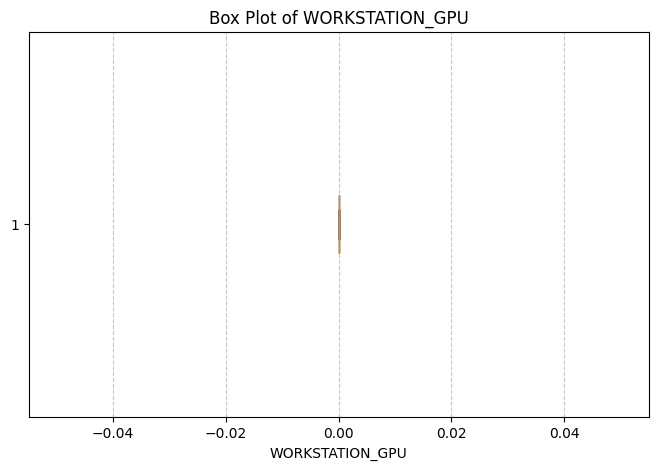

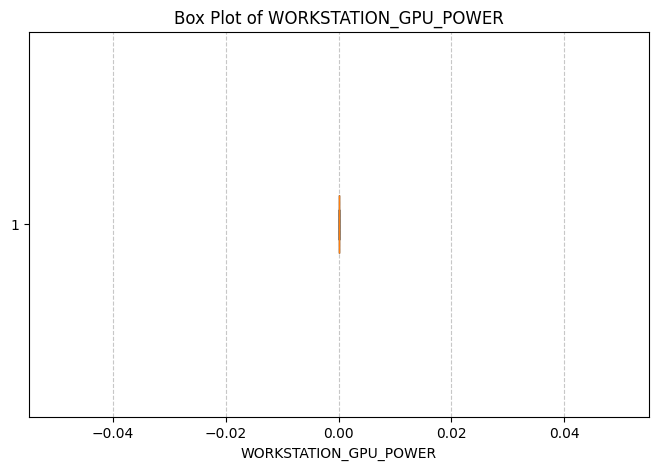

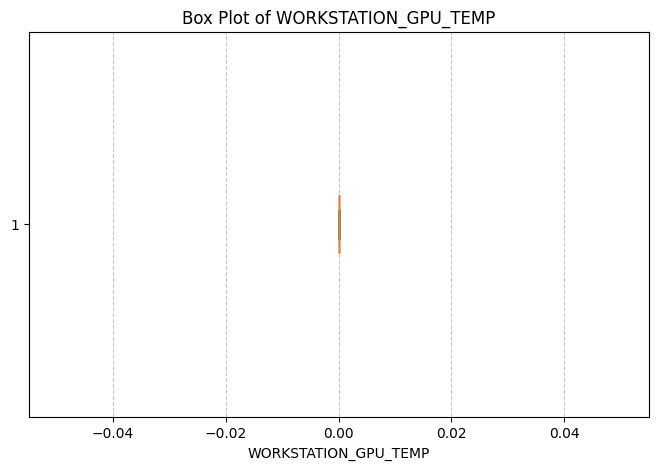

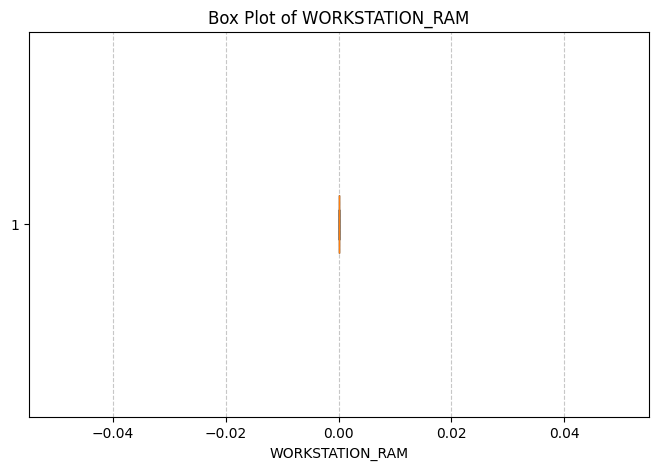

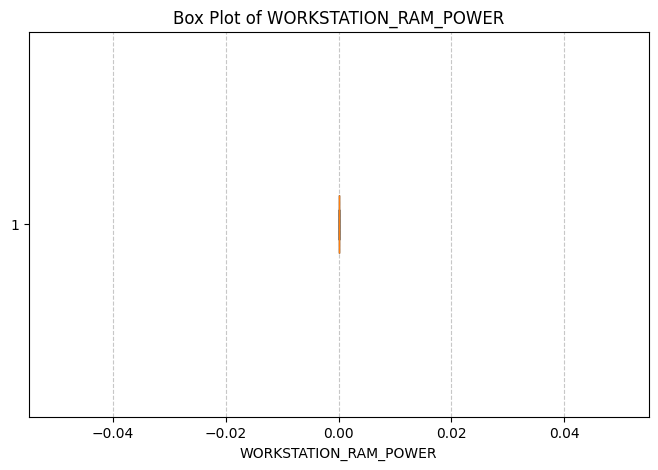

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
# df = pd.read_csv('your_file.csv')  # Replace with your DataFrame

# Exclude datetime and categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Plot boxplots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[column].dropna(), vert=False, patch_artist=True, showfliers=True,
                flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6})
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


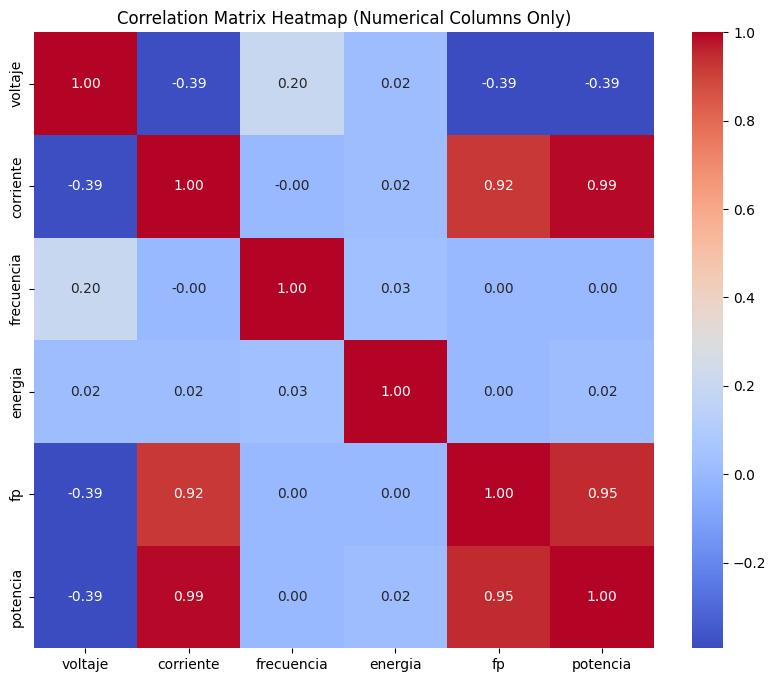

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame
# df = pd.read_csv('your_file.csv')  # Replace with your DataFrame

# Select only numerical columns
df_= df[['voltaje', 'corriente', 'frecuencia', 'energia', 'fp','potencia']]
numeric_columns = df_.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap (Numerical Columns Only)")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame
# df = pd.read_csv('your_file.csv')  # Replace with your DataFrame

# Select only numerical columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap (Numerical Columns Only)")
plt.show()


In [ ]:
filtered_df.head(10)

,weekday,voltaje,corriente,potencia,frecuencia,energia,fp,ESP32_temp,WORKSTATION_CPU,WORKSTATION_CPU_POWER,WORKSTATION_CPU_TEMP,WORKSTATION_GPU,WORKSTATION_GPU_POWER,WORKSTATION_GPU_TEMP,WORKSTATION_RAM,WORKSTATION_RAM_POWER
DATETIME,,,,,,,,,,,,,,,,
2021-05-16 00:00:00,7,120.0,0.92,95.1,60.0,23.38,0.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-16 00:00:00,7,120.0,0.92,95.1,59.9,23.38,0.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-16 00:00:00,7,120.0,0.97,102.0,60.0,23.38,0.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-16 00:00:01,7,120.0,0.97,102.0,59.9,23.38,0.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-16 00:00:01,7,120.0,0.97,102.0,60.0,23.38,0.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-16 00:00:02,7,120.0,1.04,112.9,60.0,23.38,0.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-16 00:00:02,7,120.0,1.04,112.9,59.9,23.38,0.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-16 00:00:03,7,120.0,1.04,112.9,60.0,23.38,0.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-16 00:00:03,7,120.1,0.93,96.0,60.0,23.38,0.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
print(filtered_df[features].isna().sum())  # Check for missing values
print(filtered_df[target].isna().sum())


voltaje       0
corriente     0
frecuencia    1
energia       1
fp            1
dtype: int64
1


In [34]:
filtered_df = filtered_df.dropna()  # Drop rows with NaN values


Training RNN model...
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2780/2780 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0011 - mae: 0.0147 - val_loss: 4.2103e-04 - val_mae: 0.0095
Epoch 2/20
2780/2780 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1.7948e-04 - mae: 0.0073 - val_loss: 3.7624e-04 - val_mae: 0.0083
Epoch 3/20
2780/2780 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 1.8218e-04 - mae: 0.0070 - val_loss: 4.1615e-04 - val_mae: 0.0093
Epoch 4/20
2780/2780 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 1.8965e-04 - mae: 0.0069 - val_loss: 3.5422e-04 - val_mae: 0.0078
Epoch 5/20
2780/2780 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1.6867e-04 - mae: 0.0066 - val_loss: 4.3576e-04 - val_mae: 0.0120
Epoch 6/20
2780/2780 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1.5781e-04 - mae: 0.0066 - val_loss: 3.8230e-04 - val_mae: 0.0073
Epoch 7/20
2780/2780 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1.5725e-04 - mae: 0.0064 - val_loss: 4.6568e-04 - val_mae: 0.0076
Epoch 8/20
2780/2780 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 1.6171e-04 - mae: 0.0064 - val_loss: 3.3838e-04 -

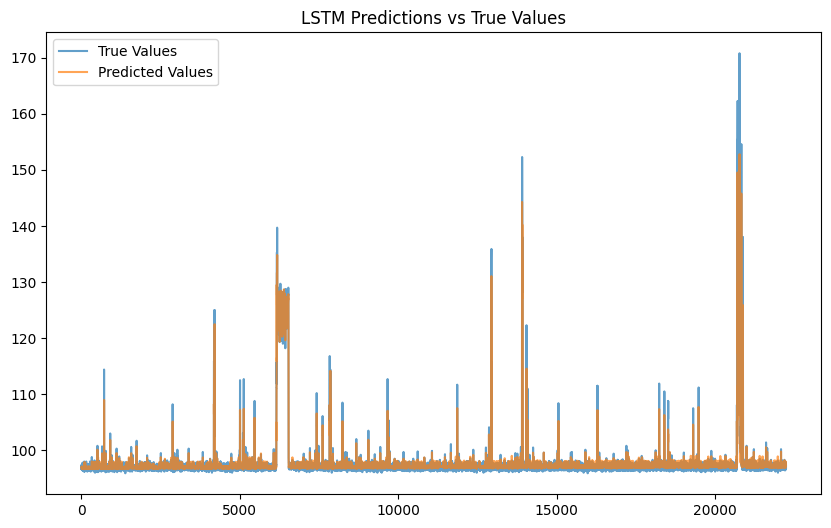

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN

# Assuming df is your DataFrame
# Replace with your actual DataFrame
# df = pd.read_csv('your_file.csv', index_col='DATETIME', parse_dates=True)

# Select relevant columns
features = ['voltaje', 'corriente', 'frecuencia', 'energia', 'fp']
target = 'potencia'

# Scale data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaled_features = scaler_x.fit_transform(filtered_df[features])
scaled_target = scaler_y.fit_transform(filtered_df[[target]])

# Prepare input-output sequences
def create_sequences(data_x, data_y, time_steps=10):
    X, y = [], []
    for i in range(len(data_x) - time_steps):
        X.append(data_x[i:i+time_steps])
        y.append(data_y[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 10  # Number of time steps for sequence
X, y = create_sequences(scaled_features, scaled_target, time_steps)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Define a function to build models
def build_model(model_type='RNN', input_shape=(X_train.shape[1], X_train.shape[2])):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(50, activation='relu', input_shape=input_shape))
    elif model_type == 'LSTM':
        model.add(LSTM(50, activation='relu', input_shape=input_shape))
    elif model_type == 'GRU':
        model.add(GRU(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Build and train models
models = {}
for model_type in ['RNN', 'LSTM', 'GRU']:
    print(f"Training {model_type} model...")
    model = build_model(model_type=model_type)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=32,
        verbose=1
    )
    models[model_type] = model

# Evaluate the models
for model_type, model in models.items():
    loss, mae = model.evaluate(X_val, y_val, verbose=0)
    print(f"{model_type} - Validation Loss: {loss:.4f}, MAE: {mae:.4f}")

# Make predictions (example with LSTM)
lstm_model = models['LSTM']
y_pred_scaled = lstm_model.predict(X_val)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Optional: Visualize predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(scaler_y.inverse_transform(y_val), label='True Values', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', alpha=0.7)
plt.title('LSTM Predictions vs True Values')
plt.legend()
plt.show()


In [ ]:
# Save models
for model_type, model in models.items():
    model.save(f"{model_type}_model.h5")
    print(f"{model_type} model saved as {model_type}_model.h5")

# Example of loading a saved model later
# from tensorflow.keras.models import load_model
# loaded_model = load_model("LSTM_model.h5")
# predictions = loaded_model.predict(X_val)


RNN model saved as RNN_model.h5
LSTM model saved as LSTM_model.h5
GRU model saved as GRU_model.h5


In [36]:
from sklearn.metrics import r2_score

# Function to compute R2 score for all models
def compute_r2(models, X_val, y_val, scaler_y):
    r2_scores = {}
    for model_type, model in models.items():
        # Predict scaled values
        y_pred_scaled = model.predict(X_val)
        # Inverse transform to get original scale
        y_pred = scaler_y.inverse_transform(y_pred_scaled)
        y_true = scaler_y.inverse_transform(y_val)
        # Compute R2 score
        r2 = r2_score(y_true, y_pred)
        r2_scores[model_type] = r2
        print(f"{model_type} - R² Score: {r2:.4f}")
    return r2_scores

# Compute R² scores for all models
r2_scores = compute_r2(models, X_val, y_val, scaler_y)


695/695 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
RNN - R² Score: 0.8945
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
LSTM - R² Score: 0.9168
695/695 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
GRU - R² Score: 0.9148


Training improved RNN model...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1390/1390 ━━━━━━━━━━━━━━━━━━━━ 74s 8ms/step - loss: 0.0016 - mae: 0.0160 - val_loss: 4.2005e-04 - val_mae: 0.0077 - learning_rate: 0.0010
Epoch 2/50
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 2.6685e-04 - mae: 0.0069 - val_loss: 5.1716e-04 - val_mae: 0.0080 - learning_rate: 0.0010
Epoch 3/50
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2.2757e-04 - mae: 0.0068 - val_loss: 4.7157e-04 - val_mae: 0.0077 - learning_rate: 0.0010
Epoch 4/50
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 2.2920e-04 - mae: 0.0068 - val_loss: 5.2843e-04 - val_mae: 0.0081 - learning_rate: 0.0010
Epoch 5/50
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 2.2824e-04 - mae: 0.0068 - val_loss: 3.9510e-04 - val_mae: 0.0071 - learning_rate: 0.0010
Epoch 6/50
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 2.0072e-04 - mae: 0.0067 - val_loss: 4.2735e-04 - val_mae: 0.0074 - learning_rate: 0.0010
Epoch 7/50
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 2.0657e-04 - mae: 0.0065 - val_loss: 

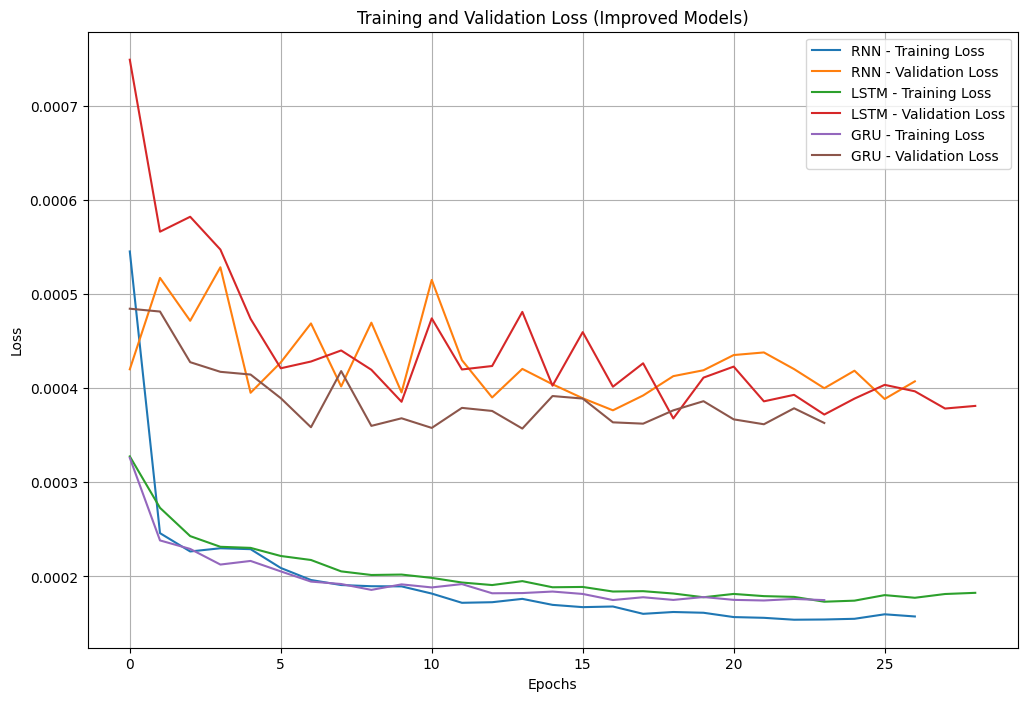

695/695 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


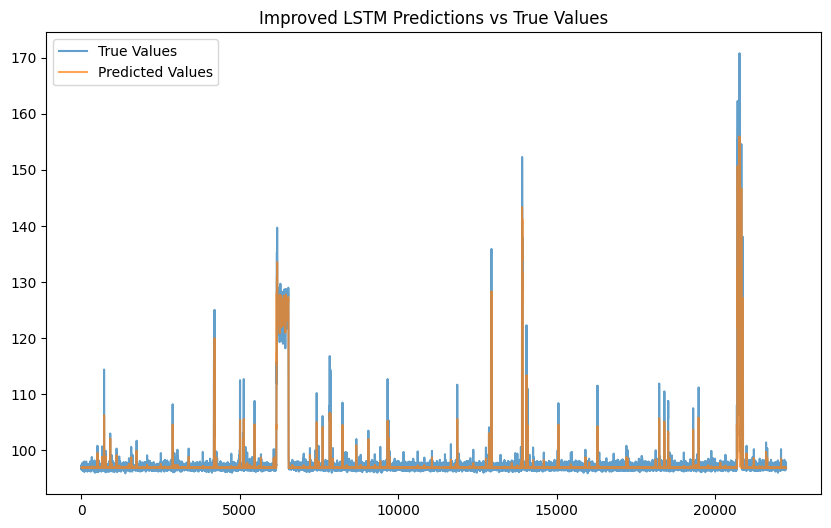

In [37]:


# Define a function to build improved models
def build_improved_model(model_type='RNN', input_shape=(X_train.shape[1], X_train.shape[2])):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(100, activation='relu', return_sequences=True, input_shape=input_shape))
        model.add(Dropout(0.2))
        model.add(SimpleRNN(50, activation='relu'))
    elif model_type == 'LSTM':
        model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=input_shape))
        model.add(Dropout(0.2))
        model.add(LSTM(50, activation='relu'))
    elif model_type == 'GRU':
        model.add(GRU(100, activation='relu', return_sequences=True, input_shape=input_shape))
        model.add(Dropout(0.2))
        model.add(GRU(50, activation='relu'))

    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Callbacks for better training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Build and train improved models
improved_models = {}
improved_histories = {}
for model_type in ['RNN', 'LSTM', 'GRU']:
    print(f"Training improved {model_type} model...")
    model = build_improved_model(model_type=model_type)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=64,
        verbose=1,
        callbacks=[early_stopping, reduce_lr]
    )
    improved_models[model_type] = model
    improved_histories[model_type] = history

# Evaluate the improved models
for model_type, model in improved_models.items():
    loss, mae = model.evaluate(X_val, y_val, verbose=0)
    print(f"Improved {model_type} - Validation Loss: {loss:.4f}, MAE: {mae:.4f}")

# Plot the training and validation loss for improved models
plt.figure(figsize=(12, 8))
for model_type, history in improved_histories.items():
    plt.plot(history.history['loss'], label=f'{model_type} - Training Loss')
    plt.plot(history.history['val_loss'], label=f'{model_type} - Validation Loss')

plt.title('Training and Validation Loss (Improved Models)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Make predictions with the improved LSTM model
improved_lstm_model = improved_models['LSTM']
y_pred_scaled = improved_lstm_model.predict(X_val)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(scaler_y.inverse_transform(y_val), label='True Values', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', alpha=0.7)
plt.title('Improved LSTM Predictions vs True Values')
plt.legend()
plt.show()


In [38]:
from sklearn.metrics import r2_score

# Function to compute R2 score for all models
def compute_r2(models, X_val, y_val, scaler_y):
    r2_scores = {}
    for model_type, model in models.items():
        # Predict scaled values
        y_pred_scaled = model.predict(X_val)
        # Inverse transform to get original scale
        y_pred = scaler_y.inverse_transform(y_pred_scaled)
        y_true = scaler_y.inverse_transform(y_val)
        # Compute R2 score
        r2 = r2_score(y_true, y_pred)
        r2_scores[model_type] = r2
        print(f"{model_type} - R² Score: {r2:.4f}")
    return r2_scores

# Compute R² scores for all models
r2_scores = compute_r2(improved_models, X_val, y_val, scaler_y)


695/695 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
RNN - R² Score: 0.9053
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
LSTM - R² Score: 0.9075
695/695 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
GRU - R² Score: 0.9102


In [41]:
# Save each model in HDF5 format
for model_type, model in improved_models.items():
    save_path = f"{model_type}_model.h5"  # Save as .h5 file
    model.save(save_path)
    print(f"{model_type} model saved as: {save_path}")


RNN model saved as: RNN_model.h5
LSTM model saved as: LSTM_model.h5
GRU model saved as: GRU_model.h5


In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Map the loss function "mse" to Keras' built-in MeanSquaredError
custom_objects = {
    "mse": MeanSquaredError()
}

# Load each model with the custom_objects argument
rnn_model = load_model("RNN_model.h5", custom_objects=custom_objects)
lstm_model = load_model("LSTM_model.h5", custom_objects=custom_objects)
gru_model = load_model("GRU_model.h5", custom_objects=custom_objects)

print("All models loaded successfully!")


2025-02-18 01:39:55.135753: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-02-18 01:39:55.135784: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-02-18 01:39:55.135790: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-02-18 01:39:55.135806: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-18 01:39:55.135821: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


All models loaded successfully!


In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.17.0


In [3]:
!touch app.py

In [4]:
!pip install streamlit


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.100.152:8501

2025-02-18 01:40:11.250761: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-02-18 01:40:11.250797: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-02-18 01:40:11.250802: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-02-18 01:40:11.250815: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-18 01:40:11.250826: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [50]:
newdf_1T=newdf.resample('1T').mean()

<ipython-input-50-abdf42c58cfb>:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  newdf_1T=newdf.resample('1T').mean()


In [51]:
print(newdf_1T.index.freq)

<Minute>


In [52]:
print(newdf_1T.index.is_monotonic_increasing)  # Should be True if time is in order
print(newdf_1T.index.to_series().diff().value_counts())  # Check time gaps


True
DATETIME
0 days 00:01:00    1114
Name: count, dtype: int64


In [53]:
newdf_1T.describe()

,weekday,voltaje,corriente,potencia,frecuencia,energia,fp,ESP32_temp,WORKSTATION_CPU,WORKSTATION_CPU_POWER,WORKSTATION_CPU_TEMP,WORKSTATION_GPU,WORKSTATION_GPU_POWER,WORKSTATION_GPU_TEMP,WORKSTATION_RAM,WORKSTATION_RAM_POWER
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.0,1108.0,1108.0,1108.0,1108.0,1108.0,1108.0,1108.0,1108.0
mean,3.902527,120.027346,0.941832,97.451700,59.964765,0.910736,0.861787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.296735,0.023620,0.024755,3.495694,0.019376,0.519648,0.007245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.000000,119.864655,0.931287,96.350442,59.872093,0.000000,0.859278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.000000,120.016973,0.936667,96.818094,59.952979,0.460000,0.860273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,120.029075,0.938584,96.935265,59.965546,0.910000,0.860544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4.000000,120.041192,0.939474,97.036152,59.978191,1.360000,0.860957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4.000000,120.076636,1.143853,125.963303,60.012264,1.810000,0.919817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
newdf_1T.shape

(1115, 16)

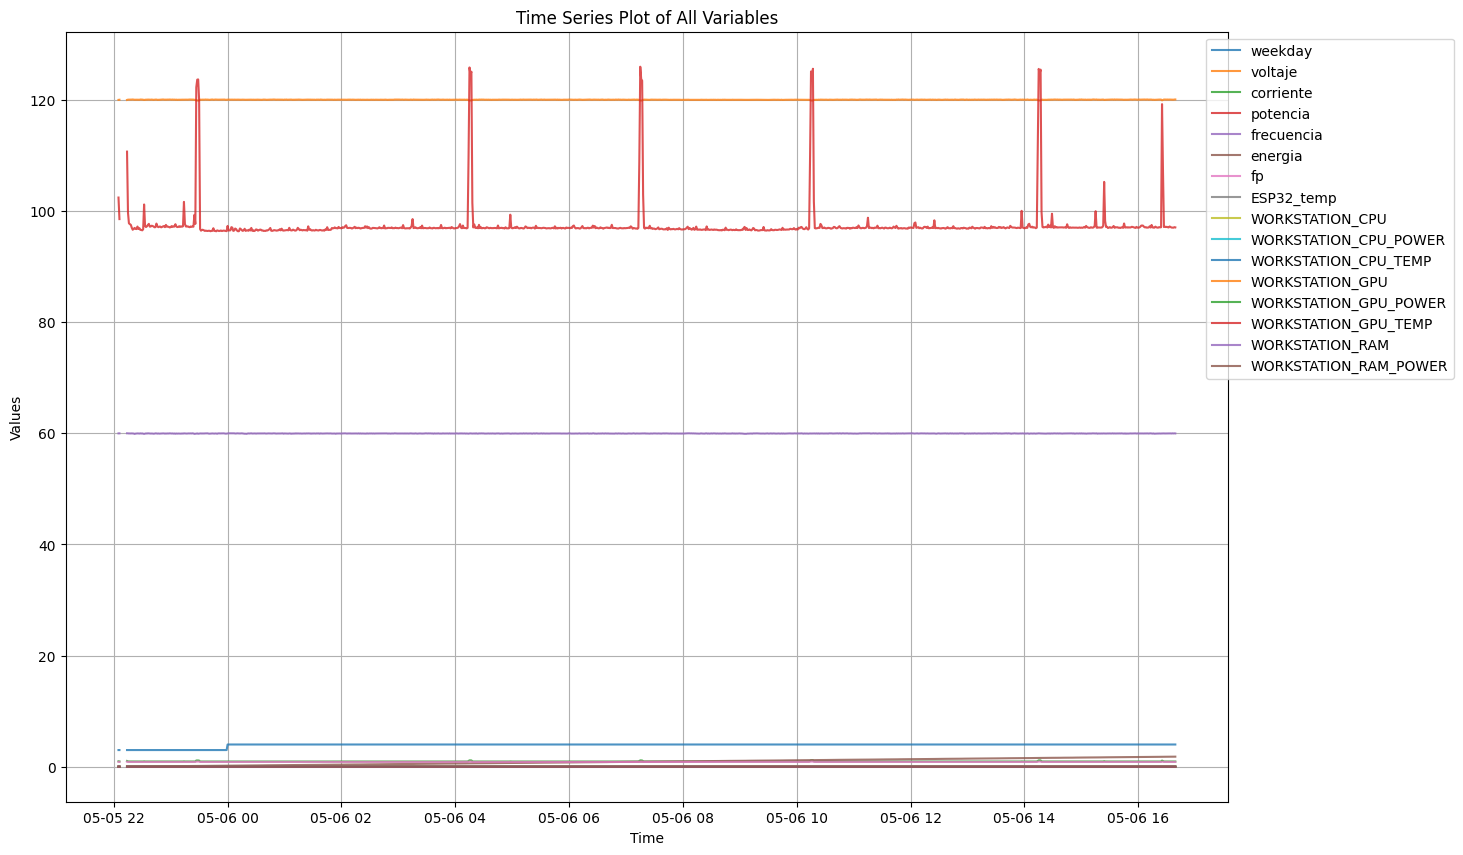

In [55]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(15, 10))

# Plot each column
for column in newdf_1T.columns:
    plt.plot(newdf_1T.index, newdf_1T[column], label=column, alpha=0.8)

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Plot of All Variables')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()


In [ ]:
newdf.isnull().sum()

,0
weekday,7
voltaje,7
corriente,7
potencia,7
frecuencia,7
energia,7
fp,7
ESP32_temp,7
WORKSTATION_CPU,7
WORKSTATION_CPU_POWER,7


In [ ]:
newdf = newdf.interpolate()


In [ ]:
newdf.isnull().sum()

,0
weekday,0
voltaje,0
corriente,0
potencia,0
frecuencia,0
energia,0
fp,0
ESP32_temp,0
WORKSTATION_CPU,0
WORKSTATION_CPU_POWER,0


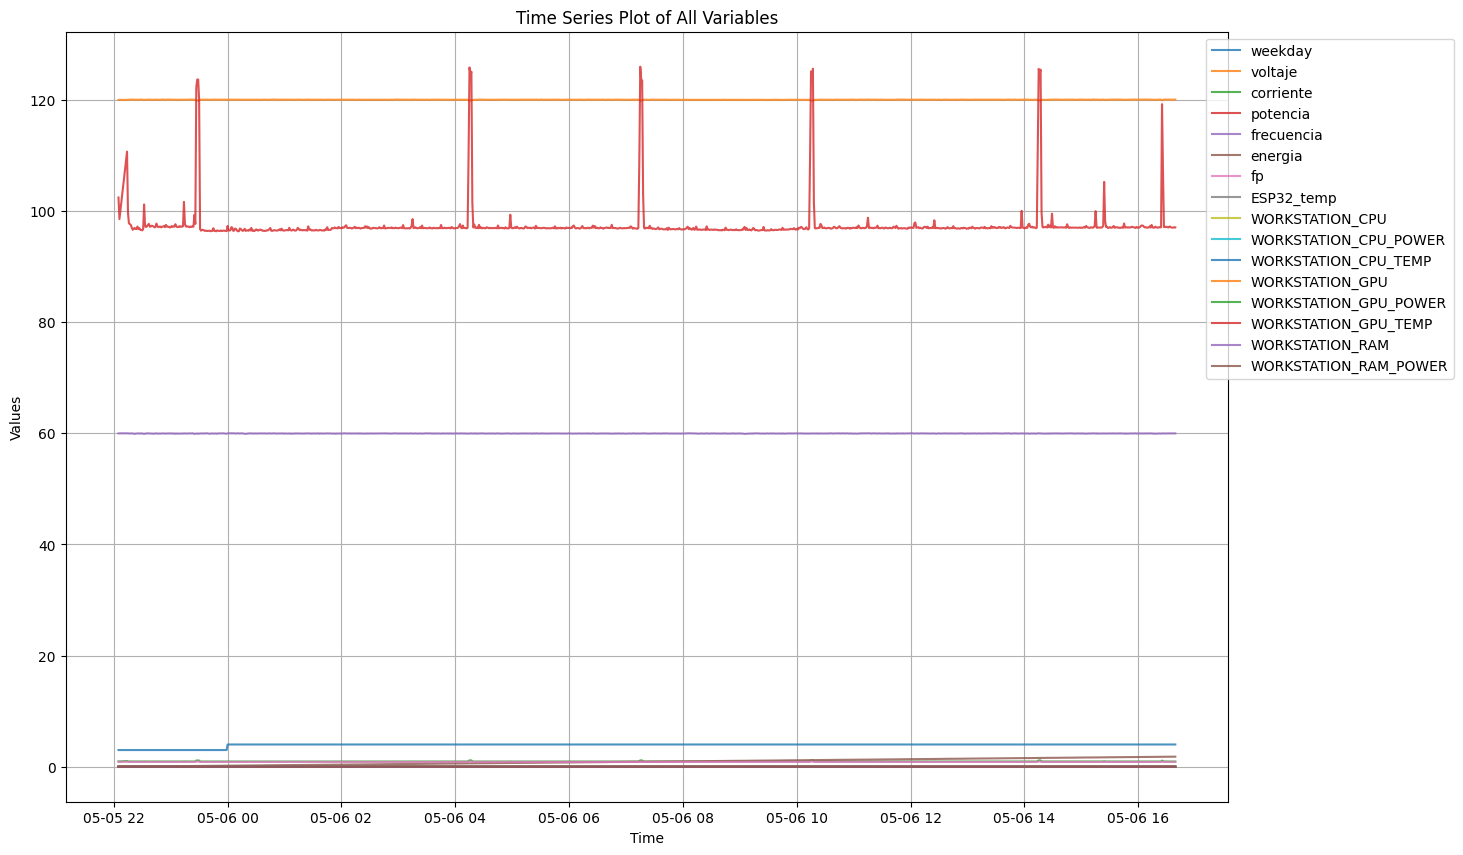

In [ ]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(15, 10))

# Plot each column
for column in newdf.columns:
    plt.plot(newdf.index, newdf[column], label=column, alpha=0.8)

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Plot of All Variables')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()
